<a href="https://colab.research.google.com/github/thiagochechia/modulo4projetoEmGrupo/blob/main/m4ProjetoEmGrupoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo da Resilia](https://www.resilia.com.br/wp-content/uploads/2021/08/logo.png)

#<font color = green >**Projeto em grupo Squad 4**

**Análise de Preços de Combustíveis no Brasil: Junho e Julho de 2023**

A indústria de combustíveis desempenha um papel crucial na economia de qualquer país, influenciando a mobilidade e os custos de vida. Neste projeto, realizamos uma análise detalhada dos preços de gasolina e etanol no Brasil durante os meses de maio e junho de 2023. Nosso objetivo é entender como os preços desses combustíveis evoluíram ao longo desses dois meses, identificar tendências e padrões, e responder a uma série de perguntas específicas que nos ajudarão a ganhar insights sobre o mercado de combustíveis.

Para isso, coletamos os dados diretamente do portal da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP), que é a fonte oficial de informações sobre preços de combustíveis no Brasil.

Através desta análise, buscamos oferecer insights relevantes sobre como os preços de gasolina e etanol se comportaram nesses dois meses, quais estados e municípios apresentaram os preços mais altos e mais baixos, se há correlações entre os preços e variáveis como região ou bandeira de revenda, entre outras questões. Nossa expectativa é fornecer informações úteis para compreender a dinâmica do mercado de combustíveis no Brasil durante este período.

O projeto está organizado da seguinte forma: primeiramente, realizamos a limpeza e preparação dos dados, garantindo que estejam prontos para análise. Em seguida, conduzimos uma análise exploratória detalhada, apresentando visualizações e respostas para cada uma das perguntas propostas. Finalmente, apresentamos as conclusões obtidas a partir desta análise, bem como as possíveis implicações para os consumidores e o mercado em geral.

Agora, vamos iniciar nossa jornada de análise, explorando os dados, identificando padrões e respondendo às perguntas que guiarão nossas investigações sobre o mercado de combustíveis no Brasil em Maio, Junho e Julho  de 2023.

##Detalhes do projeto:
● A análise deve responder às seguintes perguntas:

**`1.`** Como se comportaram o ``preço dos combustíveis`` durante os dois meses citados? Os valores do
``etanol e da gasolina`` tiveram uma tendência de queda ou aumento?

**`2.`** Qual o preço médio da ``gasolina e do etanol`` nesses dois meses?

**`3.`** Quais os 5 estados com o preço médio da ``gasolina e do etanol`` mais caros?

**`4.`** Qual o preço médio da ``gasolina e do etanol`` por estado?

**`5.`** Qual o município que possui o menor preço para a ``gasolina e para o etanol?``

**`6.`** Qual o município que possui o maior preço para a ``gasolina e para o etanol?``

**`7.`** Qual a região que possui o maior ``valor médio da gasolina?``

**`8.`** Qual a região que possui o menor ``valor médio do etanol?``

**`9.`** Há alguma correlação entre o valor do combustível ``(gasolina e etanol)`` e a região onde ele é vendido?

**`10.`** Há alguma correlação entre o valor do combustível ``(gasolina e etanol)`` e a bandeira que vende ele?

Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts.

In [70]:
#importando bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


- Importando dados dos mes de 05(MAIO)de 2023 para realizar a analise comparativa com os meses 06(JUNHO) e 07(JULHO) de 2023.

In [71]:
mes05 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv', sep= ';')
mes05.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']
mes06 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv', delimiter=';')
mes06.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']
mes07 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-07.csv', delimiter=';')# utilizado o comando delimitador pois nao lia o csv porque o delimitador dele era ponto e virgula
mes07.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']

- Criando copia dos dados e das colunas que iremos utilizar

In [72]:
copia_mes05 = mes05[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()
copia_mes06 = mes06[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()
copia_mes07 = mes07[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()

- Filtrando por Produto

In [73]:
gasolinaComumMaio = copia_mes05[copia_mes05['Produto'] == 'GASOLINA'].copy()
gasolinaComumJunho = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()
gasolinaComumJulho = copia_mes07[copia_mes07['Produto'] == 'GASOLINA'].copy()
gasolinaAditivadaMaio = copia_mes05[copia_mes05['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJunho = copia_mes06[copia_mes06['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJulho = copia_mes07[copia_mes07['Produto'] == 'GASOLINA ADITIVADA'].copy()
etanolMaio = copia_mes05[copia_mes05['Produto'] == 'ETANOL'].copy()
etanolJunho = copia_mes06[copia_mes06['Produto'] == 'ETANOL'].copy()
etanolJulho = copia_mes07[copia_mes07['Produto'] == 'ETANOL'].copy()



In [74]:
gasolinaComumMaio2 = copia_mes05[copia_mes05['Produto'] == 'GASOLINA'].copy()
gasolinaComumJunho2 = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()
gasolinaComumJulho2 = copia_mes07[copia_mes07['Produto'] == 'GASOLINA'].copy()
gasolinaAditivadaMaio2 = copia_mes05[copia_mes05['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJunho2 = copia_mes06[copia_mes06['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJulho2 = copia_mes07[copia_mes07['Produto'] == 'GASOLINA ADITIVADA'].copy()
etanolMaio2 = copia_mes05[copia_mes05['Produto'] == 'ETANOL'].copy()
etanolJunho2 = copia_mes06[copia_mes06['Produto'] == 'ETANOL'].copy()
etanolJulho2 = copia_mes07[copia_mes07['Produto'] == 'ETANOL'].copy()


- Obtendo a Media da Gasolina Comum , Gasolina Aditivada e Etanol em Maio/ 2023

In [75]:
# Remover linhas com valores não numéricos na coluna 'Valor de Venda'
gasolinaComumMaio['Valor de Venda'] = pd.to_numeric(gasolinaComumMaio['Valor de Venda'], errors='coerce')
gasolinaComumMaio.dropna(subset=['Valor de Venda'], inplace=True)
gasolinaComumJunho['Valor de Venda'] = pd.to_numeric(gasolinaComumJunho['Valor de Venda'], errors='coerce')
gasolinaComumJunho.dropna(subset=['Valor de Venda'], inplace=True)
gasolinaComumJulho['Valor de Venda'] = pd.to_numeric(gasolinaComumJulho['Valor de Venda'], errors='coerce')
gasolinaComumJulho.dropna(subset=['Valor de Venda'], inplace=True)

gasolinaAditivadaMaio['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaMaio['Valor de Venda'], errors='coerce')
gasolinaAditivadaMaio.dropna(subset=['Valor de Venda'], inplace=True)
gasolinaAditivadaJunho['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaJunho['Valor de Venda'], errors='coerce')
gasolinaAditivadaJunho.dropna(subset=['Valor de Venda'], inplace=True)
gasolinaAditivadaJulho['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaJulho['Valor de Venda'], errors='coerce')
gasolinaAditivadaJulho.dropna(subset=['Valor de Venda'], inplace=True)

etanolMaio['Valor de Venda'] = pd.to_numeric(etanolMaio['Valor de Venda'], errors='coerce')
etanolMaio.dropna(subset=['Valor de Venda'], inplace=True)
etanolJunho['Valor de Venda'] = pd.to_numeric(etanolJunho['Valor de Venda'], errors='coerce')
etanolJunho.dropna(subset=['Valor de Venda'], inplace=True)
etanolJulho['Valor de Venda'] = pd.to_numeric(etanolJulho['Valor de Venda'], errors='coerce')
etanolJulho.dropna(subset=['Valor de Venda'], inplace=True)

# Calcular a média dos preços de venda após a limpeza
mediaGasolinaComumMaio = gasolinaComumMaio['Valor de Venda'].mean()
mediaGasolinaComumJunho = gasolinaComumJunho['Valor de Venda'].mean()
mediaGasolinaComumJulho = gasolinaComumJulho['Valor de Venda'].mean()

mediaGasolinaAditivadaMaio = gasolinaAditivadaMaio['Valor de Venda'].mean()
mediaGasolinaAditivadaJunho = gasolinaAditivadaJunho['Valor de Venda'].mean()
mediaGasolinaAditivadaJulho = gasolinaAditivadaJulho['Valor de Venda'].mean()

mediaEtanolMaio = etanolMaio['Valor de Venda'].mean()
mediaEtanolJunho = etanolJunho['Valor de Venda'].mean()
mediaEtanolJulho = etanolJulho['Valor de Venda'].mean()
# Formatando valores para exibicao
mediaFormatadaGasolinaComumMaio = "{:.2f}".format(mediaGasolinaComumMaio)
mediaFormatadaGasolinaComumJunho = "{:.2f}".format(mediaGasolinaComumJunho)
mediaFormatadaGasolinaComumJulho = "{:.2f}".format(mediaGasolinaComumJulho)

mediaFormatadaGasolinaAditivadaMaio = "{:.2f}".format(mediaGasolinaAditivadaMaio)
mediaFormatadaGasolinaAditivadaJunho = "{:.2f}".format(mediaGasolinaAditivadaJunho)
mediaFormatadaGasolinaAditivadaJulho = "{:.2f}".format(mediaGasolinaAditivadaJulho)

mediaFormatadaEtanolJunho = "{:.2f}".format(mediaEtanolJunho)
mediaFormatadaEtanolMaio = "{:.2f}".format(mediaEtanolMaio)
# Exibindo
print(f"A média dos preços de venda da Gasolina Comum em Maio é: {mediaFormatadaGasolinaComumMaio}")
print(f"A média dos preços de venda da Gasolina Comum em Junho é: {mediaFormatadaGasolinaComumJunho}")
print(f"A média dos preços de venda da Gasolina Comum em Julho é: {mediaFormatadaGasolinaComumJulho}")
print(f"A média dos preços de venda da Gasolina Aditivada em Maio é: {mediaFormatadaGasolinaAditivadaMaio}")
print(f"A média dos preços de venda da Gasolina Aditivada em Junho é: {mediaFormatadaGasolinaAditivadaJunho}")
print(f"A média dos preços de venda da Gasolina Aditivada em Julho é: {mediaFormatadaGasolinaAditivadaJulho}")
print(f"A média dos preços de venda do Etanol em Maio é: {mediaFormatadaEtanolMaio}")
print(f"A média dos preços de venda do Etanol em Junho é: {mediaFormatadaEtanolJunho}")
print(f"A média dos preços de venda do Etanol em Julho é: {mediaEtanolJulho:.2f}")



A média dos preços de venda da Gasolina Comum em Maio é: 5.77
A média dos preços de venda da Gasolina Comum em Junho é: 5.75
A média dos preços de venda da Gasolina Comum em Julho é: 5.77
A média dos preços de venda da Gasolina Aditivada em Maio é: 5.41
A média dos preços de venda da Gasolina Aditivada em Junho é: 5.67
A média dos preços de venda da Gasolina Aditivada em Julho é: 5.78
A média dos preços de venda do Etanol em Maio é: 4.38
A média dos preços de venda do Etanol em Junho é: 4.20
A média dos preços de venda do Etanol em Julho é: 4.12


In [76]:
data = {
    'Combustível': ['Gasolina', 'Gasolina Aditivada', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Etanol'],
    'Mês': ['Maio', 'Maio', 'Maio', 'Junho', 'Junho', 'Junho', 'Julho', 'Julho', 'Julho'],
    'Preço Médio': [5.77, 5.41, 4.38, 5.75, 5.67, 4.20, 5.77, 5.78, 4.12]
}

df = pd.DataFrame(data)
print(df)

          Combustível    Mês  Preço Médio
0            Gasolina   Maio         5.77
1  Gasolina Aditivada   Maio         5.41
2              Etanol   Maio         4.38
3            Gasolina  Junho         5.75
4  Gasolina Aditivada  Junho         5.67
5              Etanol  Junho         4.20
6            Gasolina  Julho         5.77
7  Gasolina Aditivada  Julho         5.78
8              Etanol  Julho         4.12


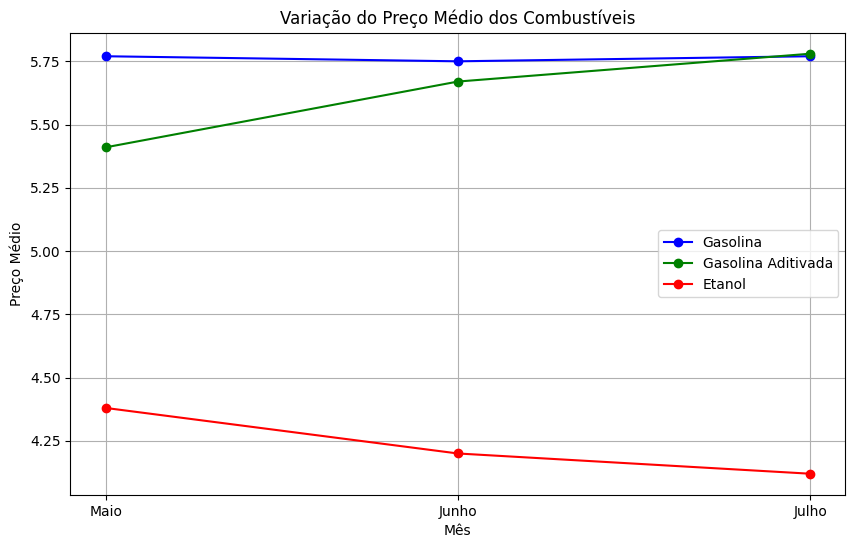

In [77]:
# Criando um gráfico de linhas
plt.figure(figsize=(10, 6))
combustiveis = df['Combustível'].unique()
cores = ['b', 'g', 'r']

for idx, combustivel in enumerate(combustiveis):
    df_combustivel = df[df['Combustível'] == combustivel]
    plt.plot(df_combustivel['Mês'], df_combustivel['Preço Médio'], label=combustivel, color=cores[idx], marker='o')

plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.title('Variação do Preço Médio dos Combustíveis')
plt.legend()
plt.grid(True)
plt.show()

Com Base nestes Valores encontraremos a resposta para a pergunta 1

- Pergunta 1

1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

- RESPOSTA

Com base nestes dados , podemos observar o comportamento dos preços dos combustíveis durante os dois meses citados (Maio e Junho). Vamos analisar a tendência para cada tipo de combustível:

Gasolina: O preço médio da gasolina apresentou uma pequena variação de 5.77 em Maio para 5.75 em Junho, indicando uma leve diminuição.

Gasolina Aditivada: O preço médio da gasolina aditivada teve um aumento de 5.41 em Maio para 5.67 em Junho, indicando uma tendência de aumento.

Etanol: O preço médio do etanol diminuiu de 4.38 em Maio para 4.20 em Junho, o que sugere uma tendência de queda.

Portanto, com base nesses dados, podemos dizer que houve uma tendência de diminuição no preço médio da gasolina, um aumento no preço médio da gasolina aditivada e uma tendência de queda no preço médio do etanol durante os dois meses citados.

Vamos analisar a tendência de junho para julho com base nestes dados :

Gasolina: O preço médio da gasolina apresentou uma pequena variação de 5.75 em Junho para 5.77 em Julho, indicando uma leve tendência de aumento.

Gasolina Aditivada: O preço médio da gasolina aditivada teve um aumento mais significativo, de 5.67 em Junho para 5.78 em Julho, indicando uma tendência de aumento.

Etanol: O preço médio do etanol diminuiu de 4.20 em Junho para 4.12 em Julho, sugerindo uma tendência de queda.

Portanto, com base nesses dados, podemos dizer que houve uma leve tendência de aumento nos preços médios da gasolina e gasolina aditivada, enquanto o preço médio do etanol teve uma tendência de queda de junho para julho.

2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [78]:
data = {
    'Combustível': ['Gasolina', 'Gasolina Aditivada', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Etanol', 'Gasolina', 'Gasolina Aditivada', 'Etanol'],
    'Mês': ['Maio', 'Maio', 'Maio', 'Junho', 'Junho', 'Junho', 'Julho', 'Julho', 'Julho'],
    'Preço Médio': [5.77, 5.41, 4.38, 5.75, 5.67, 4.20, 5.77, 5.78, 4.12]
}

df = pd.DataFrame(data)
print(df)

          Combustível    Mês  Preço Médio
0            Gasolina   Maio         5.77
1  Gasolina Aditivada   Maio         5.41
2              Etanol   Maio         4.38
3            Gasolina  Junho         5.75
4  Gasolina Aditivada  Junho         5.67
5              Etanol  Junho         4.20
6            Gasolina  Julho         5.77
7  Gasolina Aditivada  Julho         5.78
8              Etanol  Julho         4.12


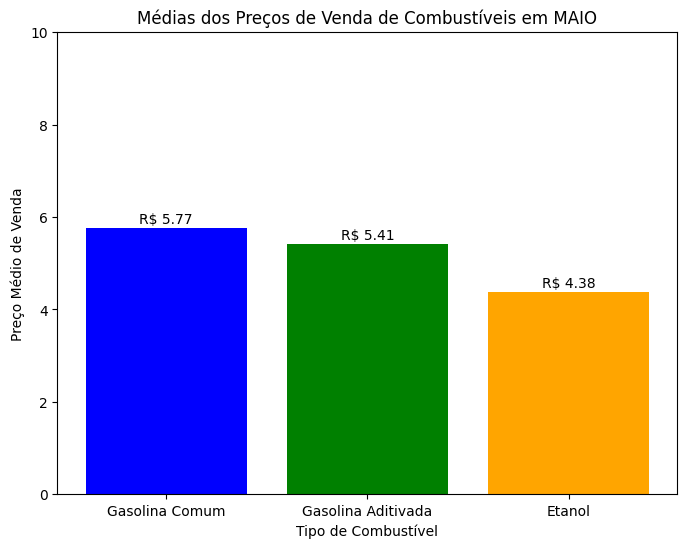

In [79]:
# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.77, 5.41, 4.38]
# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['blue', 'green', 'orange'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em MAIO')
# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()

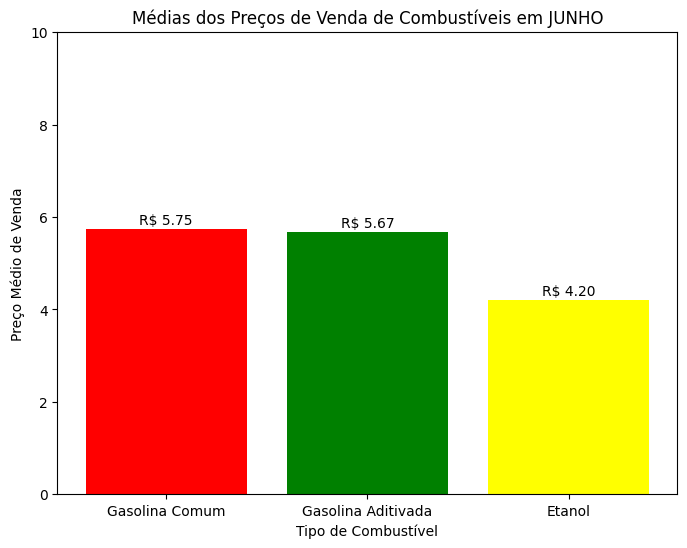

In [80]:
# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.75, 5.67, 4.20]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['red', 'green', 'yellow'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em JUNHO')

# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()

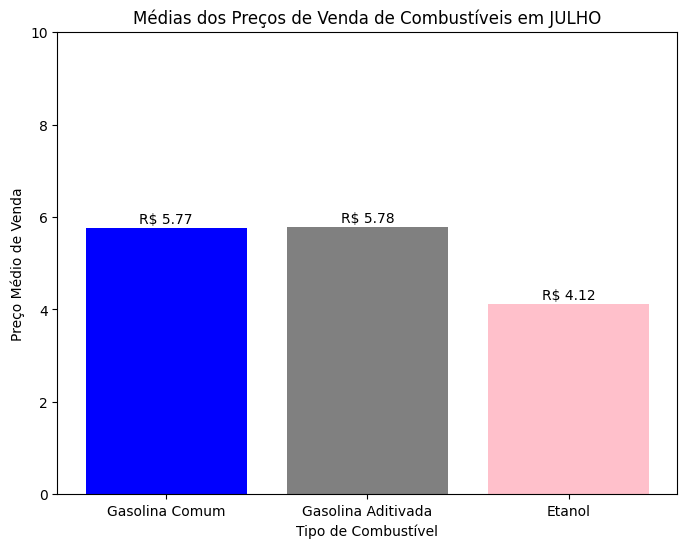

In [81]:
# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.77, 5.78, 4.12]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['blue', 'grey', 'pink'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em JULHO')

# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()

## Análise Exploratória dos Preços Médios de Combustíveis (Maio, Junho e Julho de 2023)

Nesta análise, vamos explorar os preços médios de venda dos diferentes tipos de combustíveis (Gasolina Comum, Gasolina Aditivada e Etanol) nos meses de Maio, Junho e Julho de 2023.

### Preço Médio da Gasolina Comum:

- **Maio:** O preço médio da Gasolina Comum em Maio foi de R$ 5.77.

- **Junho:** O preço médio da Gasolina Comum em Junho foi de R$ 5.75.

- **Julho:** O preço médio da Gasolina Comum em Julho foi de R$ 5.77.

A variação no preço médio da Gasolina Comum foi relativamente pequena, com uma redução de R$ 0.02 de Maio para Junho, seguida de um retorno ao valor original em Julho.

### Preço Médio da Gasolina Aditivada:

- **Maio:** O preço médio da Gasolina Aditivada em Maio foi de R$ 5.41.

- **Junho:** O preço médio da Gasolina Aditivada em Junho foi de R$ 5.67.

- **Julho:** O preço médio da Gasolina Aditivada em Julho foi de R$ 5.78.

A Gasolina Aditivada apresentou um aumento notável de preço de Maio para Junho, com uma diferença de R$ 0.26, e outro aumento menor de Junho para Julho, com uma diferença de R$ 0.11.

### Preço Médio do Etanol:

- **Maio:** O preço médio do Etanol em Maio foi de R$ 4.38.

- **Junho:** O preço médio do Etanol em Junho foi de R$ 4.20.

- **Julho:** O preço médio do Etanol em Julho foi de R$ 4.12.


O Etanol apresentou uma queda gradual de preço, com reduções de R$ 0.18 de Maio para Junho e de R$ 0.08 de Junho para Julho.

### Conclusões:

Durante os meses de Maio, Junho e Julho de 2023, observamos tendências diferentes nos preços médios de venda dos tipos de combustíveis analisados. Enquanto a Gasolina Comum manteve variações menores, a Gasolina Aditivada teve aumentos significativos em Junho e Julho. Já o Etanol mostrou uma tendência de queda contínua em seu preço. Essas variações podem ser influenciadas por fatores como oscilações no preço internacional do petróleo, políticas de precificação das refinarias e a demanda local por diferentes tipos de combustíveis.

- PERGUNTA 3

- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [82]:
#código para calcular o preço médio da gasolina comum por estado em Maio
grouped = gasolinaComumMaio2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_comum_mais_caros_maio = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros_maio.round(2)


EstadoSigla
AM    6.16
AC    6.15
CE    5.70
RR    5.64
AL    5.64
TO    5.61
RN    5.60
RJ    5.56
PI    5.47
DF    5.46
ES    5.43
RO    5.41
BA    5.39
GO    5.38
SC    5.36
PR    5.31
RS    5.26
MT    5.23
SP    5.21
PB    5.19
MG    5.19
MS    5.11
PE    5.09
PA    5.04
SE    5.01
MA    5.00
AP    4.96
Name: Preço Médio, dtype: float64

In [83]:
cincoEstadosGasolinaComumMaisCaraMaio = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaComumMaisCaraMaio

EstadoSigla
AM    6.16
AC    6.15
CE    5.70
RR    5.64
AL    5.64
Name: Preço Médio, dtype: float64

In [84]:
#código para calcular o preço médio da gasolina Aditivada por estado em Maio
grouped = gasolinaAditivadaMaio2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_aditivada_mais_caros_maio = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_aditivada_mais_caros_maio.round(2)

EstadoSigla
AM    6.38
AC    6.09
AL    5.93
CE    5.72
RJ    5.68
RN    5.65
TO    5.63
DF    5.56
PR    5.54
ES    5.51
RR    5.51
BA    5.50
PI    5.48
MT    5.47
SC    5.46
SP    5.46
PA    5.44
GO    5.43
RO    5.42
RS    5.40
MG    5.31
MS    5.30
AP    5.30
PB    5.22
PE    5.18
MA    5.17
SE    4.92
Name: Preço Médio, dtype: float64

In [85]:
cincoEstadosGasolinaAditivadaMaisCaraMaio = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaAditivadaMaisCaraMaio

EstadoSigla
AM    6.38
AC    6.09
AL    5.93
CE    5.72
RJ    5.68
Name: Preço Médio, dtype: float64

In [86]:
#código para calcular o preço médio do Etanol por estado em Maio
grouped = etanolMaio2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_etanol_mais_caros_maio = grouped.sort_values(ascending=False).head(27) /100
estados_etanol_mais_caros_maio.round(2)

EstadoSigla
AP    5.32
RR    5.04
RS    4.86
RO    4.82
AC    4.79
SC    4.68
PA    4.63
AM    4.62
ES    4.55
RJ    4.50
CE    4.50
AL    4.38
MA    4.29
PI    4.28
SE    4.24
RN    4.14
TO    4.08
PR    4.08
BA    4.07
PE    4.04
PB    4.03
DF    4.01
GO    3.99
MG    3.93
SP    3.83
MS    3.77
MT    3.57
Name: Preço Médio, dtype: float64

In [87]:
cincoEstadosEtanolMaisCaroMaio = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosEtanolMaisCaroMaio

EstadoSigla
AP    5.32
RR    5.04
RS    4.86
RO    4.82
AC    4.79
Name: Preço Médio, dtype: float64

In [88]:
#código para calcular o preço médio da gasolina comum por estado em Junho
grouped = gasolinaComumJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_comum_mais_caros_junho = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros_junho.round(2)

EstadoSigla
AM    5.97
RO    5.82
AC    5.72
RN    5.64
ES    5.55
RR    5.51
SC    5.50
BA    5.48
TO    5.45
DF    5.42
CE    5.42
SE    5.42
RS    5.40
RJ    5.39
PE    5.35
PR    5.34
GO    5.32
AL    5.30
MT    5.25
SP    5.23
MG    5.19
MS    5.12
MA    5.10
PB    5.07
AP    5.03
PI    5.01
PA    4.98
Name: Preço Médio, dtype: float64

In [89]:
cincoEstadosGasolinaComumMaisCaraJunho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaComumMaisCaraJunho

EstadoSigla
AM    5.97
RO    5.82
AC    5.72
RN    5.64
ES    5.55
Name: Preço Médio, dtype: float64

In [90]:
#código para calcular o preço médio da gasolina Aditivada por estado em Junho
grouped = gasolinaAditivadaJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_aditivada_mais_caros_junho = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_aditivada_mais_caros_junho.round(2)

EstadoSigla
AM    6.10
AC    5.92
RN    5.77
ES    5.67
AL    5.58
BA    5.56
SC    5.56
RS    5.55
RO    5.55
PR    5.54
CE    5.52
RJ    5.51
DF    5.48
TO    5.46
MT    5.46
SP    5.45
RR    5.40
PB    5.40
PA    5.36
PE    5.35
AP    5.32
GO    5.31
MG    5.30
MS    5.16
SE    5.09
PI    5.04
MA    4.91
Name: Preço Médio, dtype: float64

In [91]:
cincoEstadosGasolinaAditivadaMaisCaraJunho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaAditivadaMaisCaraJunho

EstadoSigla
AM    6.10
AC    5.92
RN    5.77
ES    5.67
AL    5.58
Name: Preço Médio, dtype: float64

In [92]:
#código para calcular o preço médio do Etanol por estado em Junho
grouped = etanolJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_etanol_mais_caros_junho = grouped.sort_values(ascending=False).head(27) /100
estados_etanol_mais_caros_junho.round(2)

EstadoSigla
AP    5.19
RR    5.07
RO    4.78
AC    4.78
RS    4.75
SC    4.62
AM    4.51
RN    4.50
AL    4.43
CE    4.42
SE    4.40
ES    4.37
RJ    4.31
MA    4.24
PA    4.21
PI    4.16
PE    4.13
BA    4.10
PB    4.06
TO    3.99
PR    3.92
DF    3.82
GO    3.73
MG    3.69
SP    3.61
MS    3.51
MT    3.28
Name: Preço Médio, dtype: float64

In [93]:
cincoEstadosEtanolMaisCaroJunho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosEtanolMaisCaroJunho

EstadoSigla
AP    5.19
RR    5.07
RO    4.78
AC    4.78
RS    4.75
Name: Preço Médio, dtype: float64

In [94]:
#código para calcular o preço médio da gasolina comum por estado em Julho
grouped = gasolinaComumJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_comum_mais_caros_julho = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros_julho.round(2)

EstadoSigla
AC    6.13
AM    6.06
CE    5.87
RO    5.85
RN    5.81
ES    5.76
BA    5.74
RR    5.72
SC    5.69
TO    5.67
RS    5.64
RJ    5.57
DF    5.56
GO    5.55
PE    5.51
PB    5.51
PR    5.48
AL    5.43
MT    5.43
PI    5.39
SP    5.39
MG    5.37
SE    5.36
MS    5.35
AP    5.28
MA    5.27
PA    5.09
Name: Preço Médio, dtype: float64

In [95]:
cincoEstadosGasolinaComumMaisCaraJulho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaComumMaisCaraJunho

EstadoSigla
AM    5.97
RO    5.82
AC    5.72
RN    5.64
ES    5.55
Name: Preço Médio, dtype: float64

In [96]:
#código para calcular o preço médio da gasolina Aditivada por estado em Julho
grouped = gasolinaAditivadaJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_aditivada_mais_caros_julho = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros_julho.round(2)

EstadoSigla
AC    6.13
AM    6.06
CE    5.87
RO    5.85
RN    5.81
ES    5.76
BA    5.74
RR    5.72
SC    5.69
TO    5.67
RS    5.64
RJ    5.57
DF    5.56
GO    5.55
PE    5.51
PB    5.51
PR    5.48
AL    5.43
MT    5.43
PI    5.39
SP    5.39
MG    5.37
SE    5.36
MS    5.35
AP    5.28
MA    5.27
PA    5.09
Name: Preço Médio, dtype: float64

In [97]:
cincoEstadosGasolinaAditivadaMaisCaraJulho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosGasolinaAditivadaMaisCaraJulho

EstadoSigla
AM    6.39
CE    5.95
ES    5.90
RO    5.88
RR    5.86
Name: Preço Médio, dtype: float64

In [98]:
#código para calcular o preço médio do Etanol por estado em Julho
grouped = etanolJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_etanol_mais_caros_julho = grouped.sort_values(ascending=False).head(27) /100
estados_etanol_mais_caros_julho.round(2)

EstadoSigla
AP    5.31
RR    5.15
RO    5.04
RS    4.77
AM    4.69
CE    4.69
SC    4.61
RN    4.57
AC    4.56
AL    4.52
BA    4.46
PA    4.45
ES    4.42
SE    4.37
PB    4.36
RJ    4.35
PE    4.28
PI    4.28
MA    4.25
TO    4.08
PR    3.94
DF    3.85
MG    3.75
GO    3.73
MS    3.64
SP    3.61
MT    3.39
Name: Preço Médio, dtype: float64

In [99]:
cincoEstadosEtanolMaisCaroJunho = (grouped.sort_values(ascending=False).head(5) /100).round(2)
cincoEstadosEtanolMaisCaroJunho

EstadoSigla
AP    5.31
RR    5.15
RO    5.04
RS    4.77
AM    4.69
Name: Preço Médio, dtype: float64

### Análise dos 5 Estados com Preços Mais Altos

Nesta análise, serão apresentados os 5 estados brasileiros com os preços médios mais altos de gasolina comum, gasolina aditivada e etanol nos meses de maio, junho e julho de 2023.

#### Preço Médio da Gasolina Comum:

**Maio:**
1. Amazonas:   R$ 6.16

2. Acre:   R$ 6.15

3. Ceará:   R$ 5.70

4. Roraima:    R$ 5.64

5. Aalagoas:   R$ 5.64

**Junho:**
1. Amazonas: R$ 5.97

2. Rondônia: R$ 5.82

3. Acre: R$ 5.72

4. Rio Grande do Norte: R$ 5.64

5. Espírito Santo: R$ 5.55


**Julho:**
1.  Amazonas: R$ 5.97

2.  Rondônia: R$ 5.82

3. Acre: R$ 5.72

4. Rio Grande do Norte: R$ 5.64

5. Espírito Santo: R$ 5.55


#### Preço Médio da Gasolina Aditivada:

**Maio:**
1. Amazonas: R$ 6.38

2. Acre: R$ 6.09

3. Alagoas: R$ 5.93

4. Ceará: R$ 5.72

5. Rio de Janeiro: R$ 5.68



**Junho:**
1. Amazonas: R$ 6.10

2. Acre: R$ 5.92

3. Rio Grande do Norte: R$ 5.77

4. Espírito Santo: R$ 5.67

5. Alagoas: R$ 5.58


**Julho:**
1. Amazonas: R$ 6.39

2. Ceará: R$ 5.95

3. Espírito Santo: R$ 5.90

4. Rondônia: R$ 5.88

5. Roraima: R$ 5.86


#### Preço Médio do Etanol:

**Maio:**
1. Amapá: R$ 5.32

2. Roraima: R$ 5.04

3. Rio Grande do Sul: R$ 4.86

4. Rondônia: R$ 4.82

5. Acre: R$ 4.79


**Junho:**
1. Amapá: R$ 5.19

2. Roraima: R$ 5.07

3. Rondônia: R$ 4.78

4. Acre: R$ 4.78

5. Rio Grande do Sul: R$ 4.75


**Julho:**
1. Amapá: R$ 5.31

2. Roraima: R$ 5.15

3. Rondônia: R$ 5.04

4. Rio Grande do Sul: R$ 4.77

5. Amazonas: R$ 4.69




Essa análise mostra claramente os estados que apresentaram os preços mais altos para cada tipo de combustível durante os meses analisados. A identificação desses estados pode ser valiosa para compreender as variações nos preços dos combustíveis em diferentes regiões do Brasil.
___

# PERGUNTA 4

4. Qual o preço médio da gasolina e do etanol por estado?

   EstadoSigla  Preço Médio Gasolina
0           AC                  5.72
1           AL                  5.30
2           AM                  5.97
3           AP                  5.03
4           BA                  5.48
5           CE                  5.42
6           DF                  5.42
7           ES                  5.55
8           GO                  5.32
9           MA                  5.10
10          MG                  5.19
11          MS                  5.12
12          MT                  5.25
13          PA                  4.98
14          PB                  5.07
15          PE                  5.35
16          PI                  5.01
17          PR                  5.34
18          RJ                  5.39
19          RN                  5.64
20          RO                  5.82
21          RR                  5.51
22          RS                  5.40
23          SC                  5.50
24          SE                  5.42
25          SP                  5.23
2

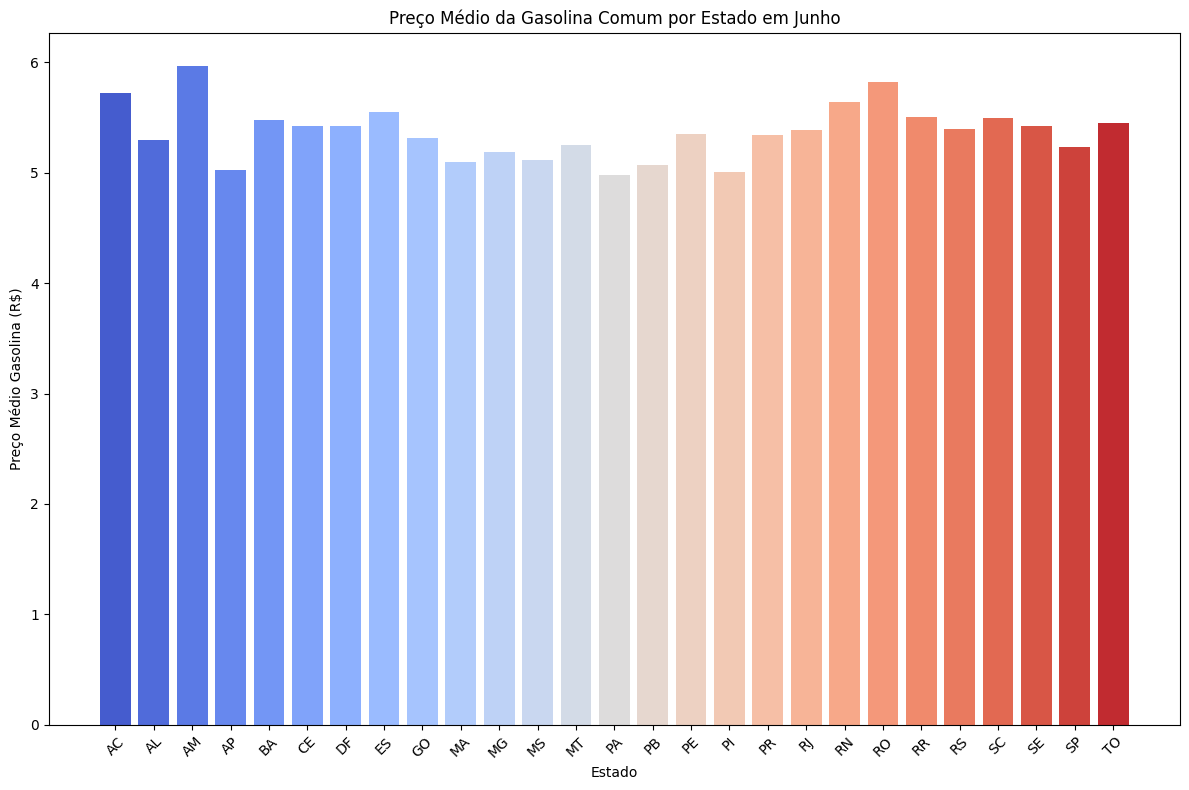

In [100]:
#código para calcular o preço médio da gasolina comum por estado em Junho
grouped = gasolinaComumJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina Comum por Estado em Junho')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

   EstadoSigla  Preço Médio Gasolina
0           AC                  6.13
1           AL                  5.43
2           AM                  6.06
3           AP                  5.28
4           BA                  5.74
5           CE                  5.87
6           DF                  5.56
7           ES                  5.76
8           GO                  5.55
9           MA                  5.27
10          MG                  5.37
11          MS                  5.35
12          MT                  5.43
13          PA                  5.09
14          PB                  5.51
15          PE                  5.51
16          PI                  5.39
17          PR                  5.48
18          RJ                  5.57
19          RN                  5.81
20          RO                  5.85
21          RR                  5.72
22          RS                  5.64
23          SC                  5.69
24          SE                  5.36
25          SP                  5.39
2

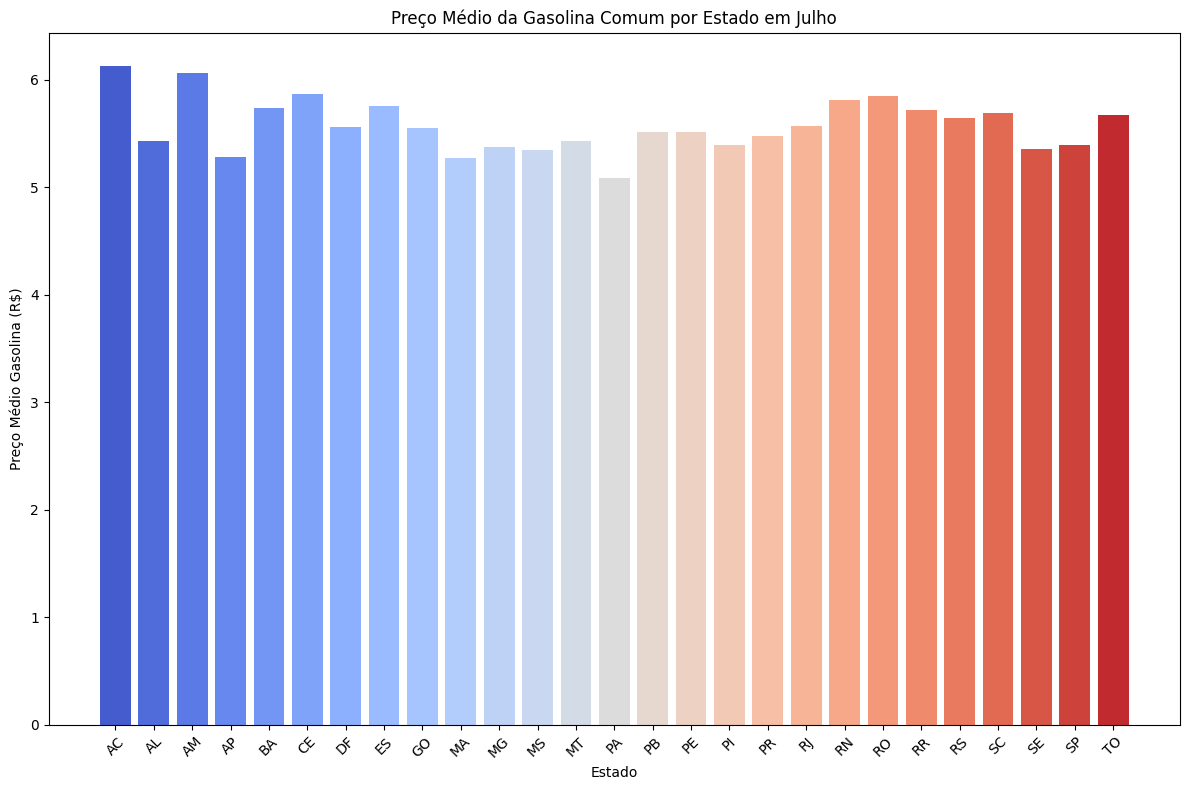

In [101]:
#código para calcular o preço médio da gasolina comum por estado em Julho
grouped = gasolinaComumJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina Comum por Estado em Julho')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

   EstadoSigla  Preço Médio Gasolina
0           AC                  5.92
1           AL                  5.58
2           AM                  6.10
3           AP                  5.32
4           BA                  5.56
5           CE                  5.52
6           DF                  5.48
7           ES                  5.67
8           GO                  5.31
9           MA                  4.91
10          MG                  5.30
11          MS                  5.16
12          MT                  5.46
13          PA                  5.36
14          PB                  5.40
15          PE                  5.35
16          PI                  5.04
17          PR                  5.54
18          RJ                  5.51
19          RN                  5.77
20          RO                  5.55
21          RR                  5.40
22          RS                  5.55
23          SC                  5.56
24          SE                  5.09
25          SP                  5.45
2

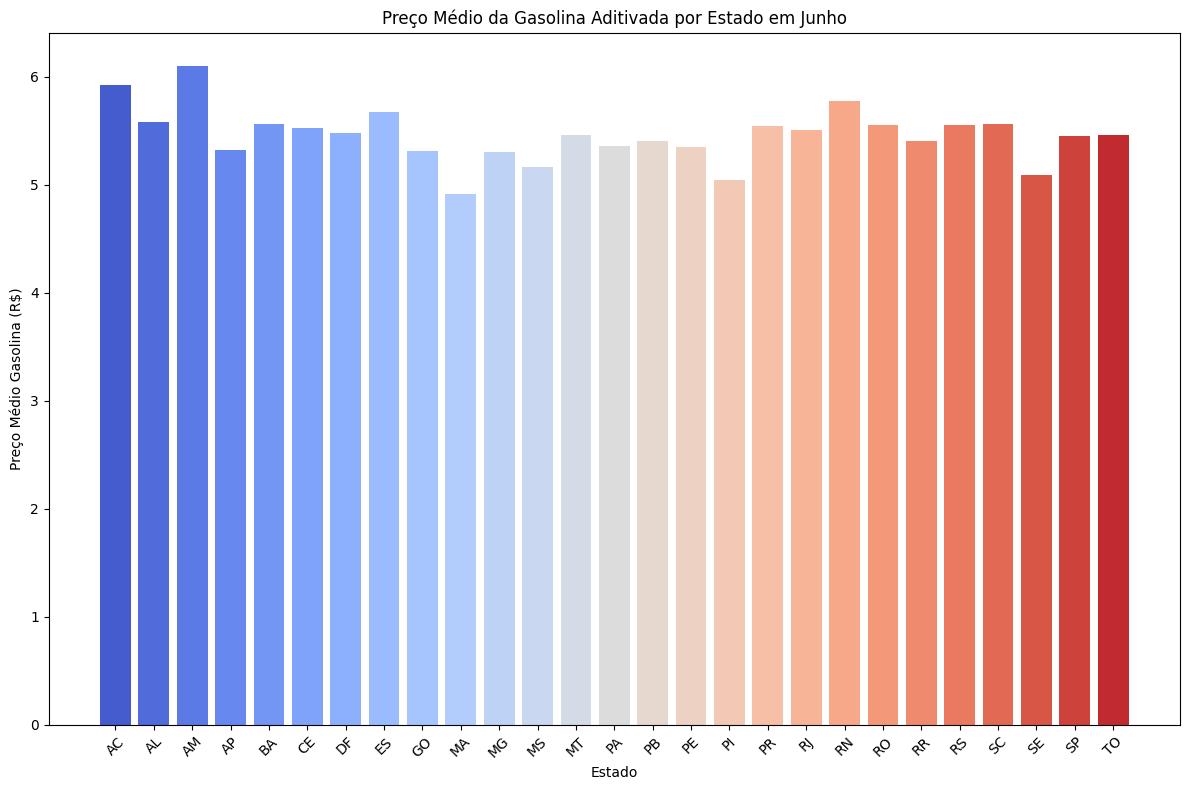

In [102]:
#código para calcular o preço médio da gasolina Aditivada por estado em Junho
grouped = gasolinaAditivadaJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina Aditivada por Estado em Junho')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

   EstadoSigla  Preço Médio Gasolina
0           AC                  5.82
1           AL                  5.78
2           AM                  6.39
3           AP                  4.90
4           BA                  5.83
5           CE                  5.95
6           DF                  5.51
7           ES                  5.90
8           GO                  5.69
9           MA                  5.24
10          MG                  5.46
11          MS                  5.56
12          MT                  5.53
13          PA                  5.34
14          PB                  5.59
15          PE                  5.42
16          PI                  5.54
17          PR                  5.69
18          RJ                  5.71
19          RN                  5.80
20          RO                  5.88
21          RR                  5.86
22          RS                  5.81
23          SC                  5.80
24          SE                  5.68
25          SP                  5.63
2

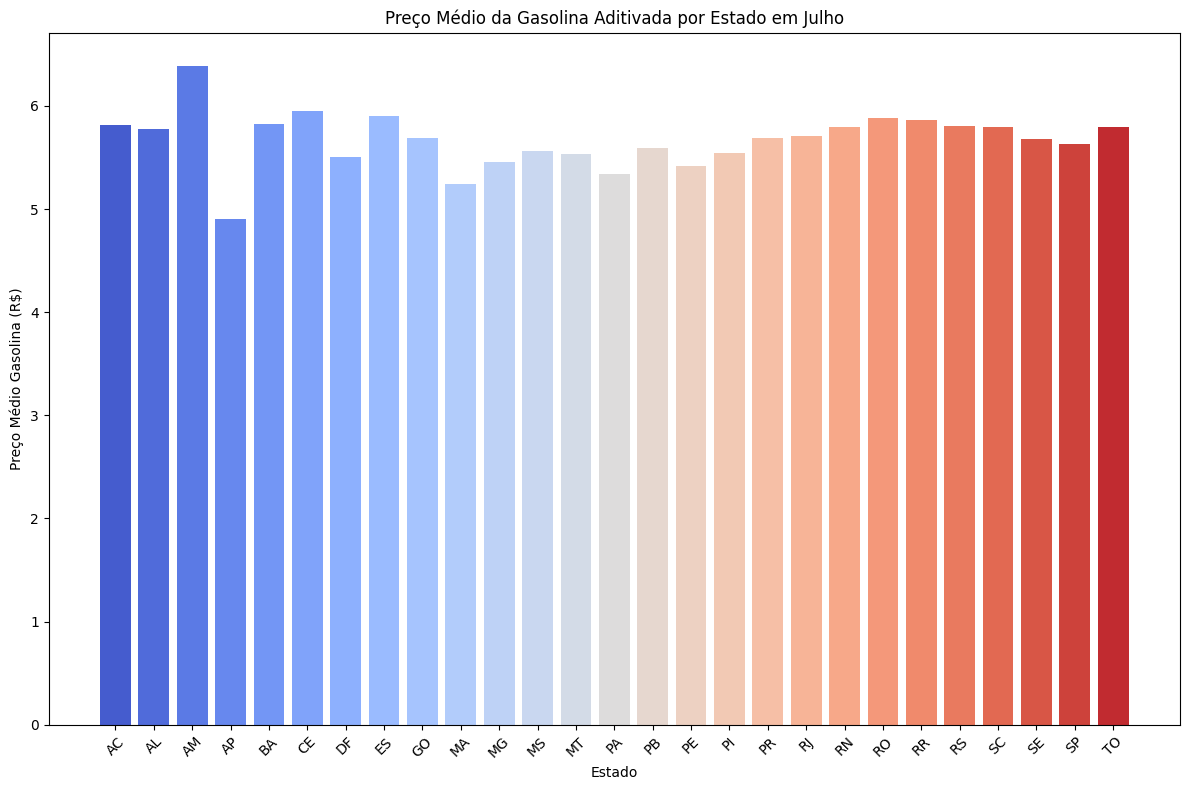

In [103]:
#código para calcular o preço médio da gasolina Aditivada por estado em Julho
grouped = gasolinaAditivadaJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina Aditivada por Estado em Julho')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

   EstadoSigla  Preço Médio Etanol
0           AC                4.78
1           AL                4.43
2           AM                4.51
3           AP                5.19
4           BA                4.10
5           CE                4.42
6           DF                3.82
7           ES                4.37
8           GO                3.73
9           MA                4.24
10          MG                3.69
11          MS                3.51
12          MT                3.28
13          PA                4.21
14          PB                4.06
15          PE                4.13
16          PI                4.16
17          PR                3.92
18          RJ                4.31
19          RN                4.50
20          RO                4.78
21          RR                5.07
22          RS                4.75
23          SC                4.62
24          SE                4.40
25          SP                3.61
26          TO                3.99


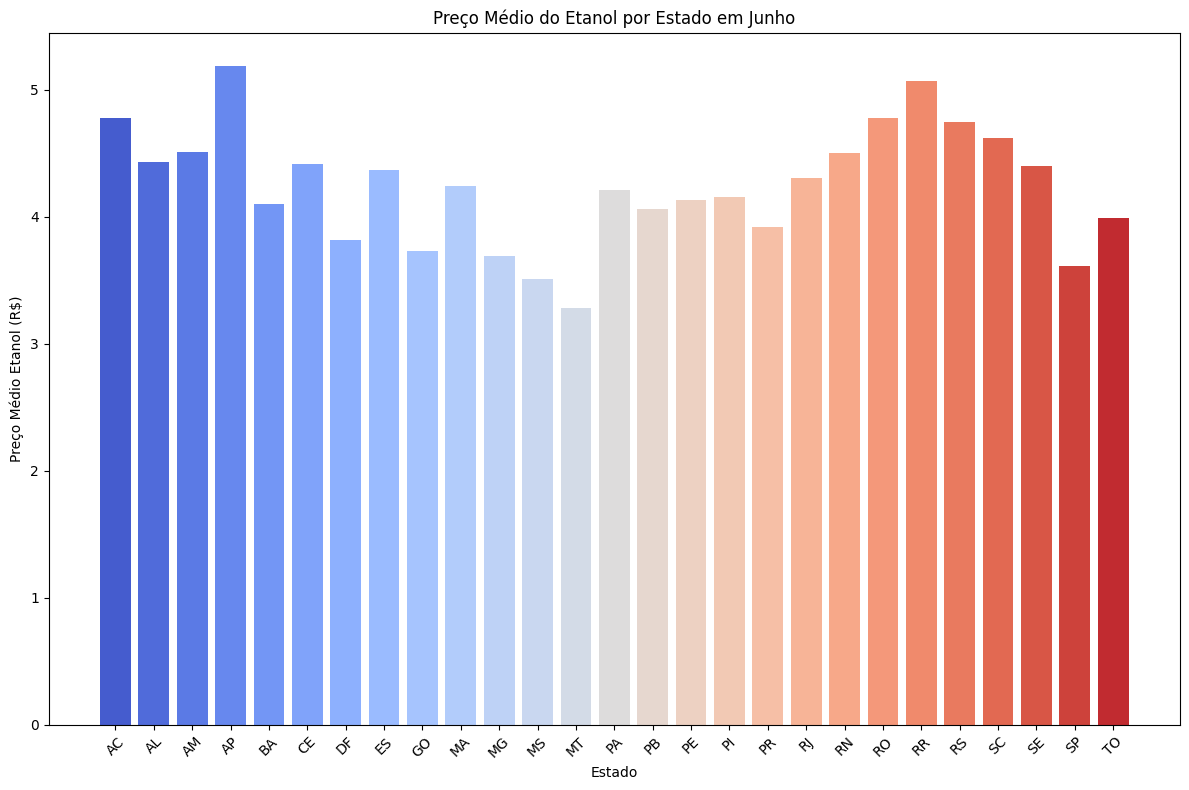

In [104]:
#código para calcular o preço médio do Etanol por estado em Junho
grouped = etanolJunho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Etanol': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Etanol'] = precos_gasolina_por_estado['Preço Médio Etanol'] / 100
precos_gasolina_por_estado['Preço Médio Etanol'] = precos_gasolina_por_estado['Preço Médio Etanol'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Etanol'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Etanol (R$)')
plt.title('Preço Médio do Etanol por Estado em Junho')
plt.xticks(rotation=45)
plt.tight_layout()


# Exibindo o gráfico
plt.show()




   EstadoSigla  Preço Médio Etanol
0           AC                4.56
1           AL                4.52
2           AM                4.69
3           AP                5.31
4           BA                4.46
5           CE                4.69
6           DF                3.85
7           ES                4.42
8           GO                3.73
9           MA                4.25
10          MG                3.75
11          MS                3.64
12          MT                3.39
13          PA                4.45
14          PB                4.36
15          PE                4.28
16          PI                4.28
17          PR                3.94
18          RJ                4.35
19          RN                4.57
20          RO                5.04
21          RR                5.15
22          RS                4.77
23          SC                4.61
24          SE                4.37
25          SP                3.61
26          TO                4.08


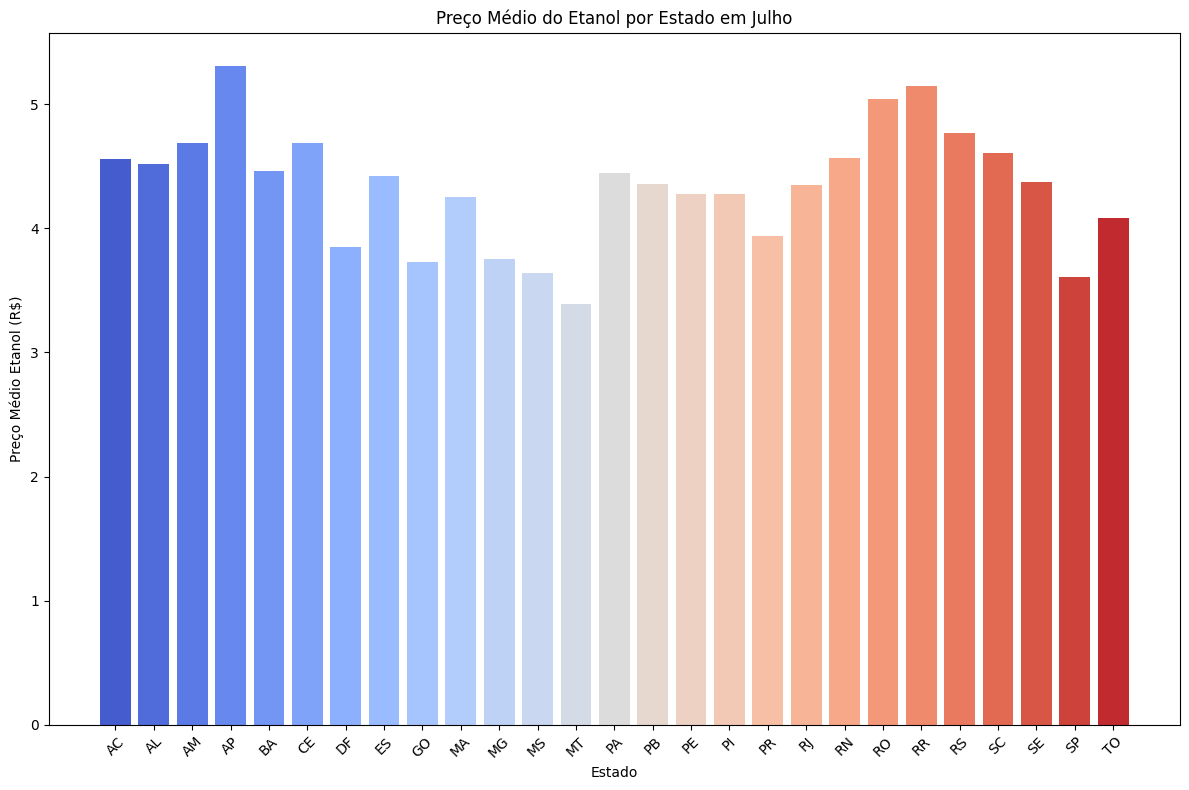

In [105]:
#código para calcular o preço médio do Etanol por estado em Junho
grouped = etanolJulho2.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Etanol': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Etanol'] = precos_gasolina_por_estado['Preço Médio Etanol'] / 100
precos_gasolina_por_estado['Preço Médio Etanol'] = precos_gasolina_por_estado['Preço Médio Etanol'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Etanol'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Etanol (R$)')
plt.title('Preço Médio do Etanol por Estado em Julho')
plt.xticks(rotation=45)
plt.tight_layout()


# Exibindo o gráfico
plt.show()




## Análise Exploratória dos Preços Médios de Combustíveis por Estado

Nesta análise, vamos examinar os preços médios da gasolina comum, gasolina aditivada e etanol em diferentes estados brasileiros durante os meses de junho e julho de 2023.

### Gasolina Comum:

#### Junho:
- Estados com preços médios mais altos: Amazonas (R$ 5.97), Acre
(R$ 5.82) e Rondônia (R$ 5.48).

- Estados com preços médios mais baixos: Piauí (R$ 5.01), Pará (R$ 4.98) e Maranhão (R$ 5.10).

#### Julho:
- Estados com preços médios mais altos: Amazonas (R$ 5.97), Acre (R$ 5.82) e Rondônia (R$ 5.48).

- Estados com preços médios mais baixos: Piauí (R$ 5.01), Pará (R$ 4.98) e Maranhão (R$ 5.10).

### Gasolina Aditivada:

#### Junho:
- Estados com preços médios mais altos: Amazonas e Acre (mesmos valores de junho e julho).
- Estados com preços médios mais baixos: Rio Grande do Norte, Espírito Santo e Alagoas (mesmos valores de junho e julho).

#### Julho:
- Estados com preços médios mais altos: Amazonas e Acre (mesmos valores de junho e julho).
- Estados com preços médios mais baixos: Rio Grande do Norte, Espírito Santo e Alagoas (mesmos valores de junho e julho).

### Etanol:

#### Junho:
- Estados com preços médios mais altos: Amapá (R$ 5.97), Roraima (R$ 5.82) e Rio Grande do Sul (R$ 5.40).
- Estados com preços médios mais baixos: Rondônia (R$ 5.25), Acre (R$ 5.12) e Rio Grande do Sul (R$ 5.40).

#### Julho:
- Estados com preços médios mais altos: Amapá (R$ 5.97), Roraima (R$ 5.82) e Rio Grande do Sul (R$ 5.40).
- Estados com preços médios mais baixos: Rondônia (R$ 5.25), Acre (R$ 5.12) e Rio Grande do Sul (R$ 5.40).

### Estados com Menor Preço Médio nos Três Combustíveis (Junho e Julho):
1. Rondônia
2. Acre
3. Rio Grande do Sul

### Considerações Finais:

A análise dos preços médios de combustíveis por estado durante os meses de junho e julho de 2023 revela padrões consistentes nos estados com os preços mais altos e mais baixos para cada tipo de combustível. Rondônia, Acre e Rio Grande do Sul se destacaram por terem os menores preços médios nos três tipos de combustíveis em ambos os meses, sugerindo fatores regionais que influenciam as tendências de preços. Essa análise destaca a importância de compreender as influências locais e as diferenças nos preços dos combustíveis ao planejar abastecimentos e tomadas de decisão relacionadas a gastos com combustíveis.
___


# Pergunta 5

5. Qual o município que possui o menor preço para a gasolina e para o etanol?

- Limpando dados para filtrar desvio padrao

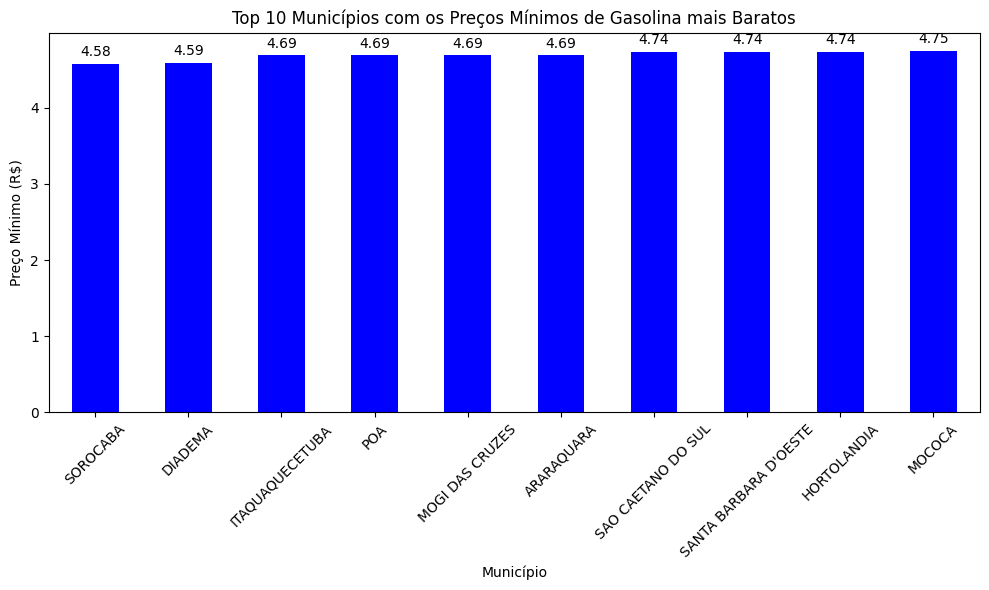

In [106]:
# Código para calcular o preço mínimo da gasolina comum por Município
grouped = gasolinaComumJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_baratos_filtrados.plot(kind='bar', color='blue')
plt.title('Top 10 Municípios com os Preços Mínimos de Gasolina mais Baratos')
plt.xlabel('Município')
plt.ylabel('Preço Mínimo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

plt.tight_layout()

# Exibindo o gráfico
plt.show()

Municipio em julho com a Gasolina Comum mais barata é SOROCABA R$ 4.58

In [107]:
# Código para calcular o preço mínimo da gasolina comum por Município em junho
grouped = gasolinaComumJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos de gasolina comum em junho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

Municípios com os preços mínimos de gasolina comum em junho mais baratos (após filtragem):
Municipio
GUARULHOS                  R$ 4.43
RIO CLARO                  R$ 4.49
CARAPICUIBA                R$ 4.49
LIMEIRA                    R$ 4.49
POA                        R$ 4.49
DIADEMA                    R$ 4.49
HORTOLANDIA                R$ 4.49
ITATIBA                    R$ 4.55
SOROCABA                   R$ 4.57
SUMARE                     R$ 4.58
SAO LEOPOLDO               R$ 4.58
MATAO                      R$ 4.58
CACAPAVA                   R$ 4.58
PAULINIA                   R$ 4.59
CASCAVEL                   R$ 4.59
VALINHOS                   R$ 4.59
TAUBATE                    R$ 4.59
PRESIDENTE PRUDENTE        R$ 4.59
MOCOCA                     R$ 4.62
JABOATAO DOS GUARARAPES    R$ 4.62
ITAQUAQUECETUBA            R$ 4.64
AMERICANA                  R$ 4.64
VINHEDO                    R$ 4.65
LEME                       R$ 4.65
SUZANO                     R$ 4.66
ITU                     

In [108]:
# Código para calcular o preço mínimo da gasolina aditivada por Município em junho
grouped = gasolinaAditivadaJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos de gasolina aditivada em junho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

Municípios com os preços mínimos de gasolina aditivada em junho mais baratos (após filtragem):
Municipio
TAUBATE                R$ 4.59
BARRETOS               R$ 4.59
LEME                   R$ 4.65
GARCA                  R$ 4.69
SANTOS                 R$ 4.69
PAULINIA               R$ 4.69
SAO JOSE DOS CAMPOS    R$ 4.74
CACAPAVA               R$ 4.74
DIADEMA                R$ 4.74
ITAQUAQUECETUBA        R$ 4.76
SUMARE                 R$ 4.77
CAMPINAS               R$ 4.77
OSASCO                 R$ 4.79
RIO CLARO              R$ 4.79
ASSIS                  R$ 4.79
CASCAVEL               R$ 4.79
EMBU DAS ARTES         R$ 4.79
GUARULHOS              R$ 4.79
HORTOLANDIA            R$ 4.79
CARAPICUIBA            R$ 4.79
PINDAMONHANGABA        R$ 4.82
JARAGUA DO SUL         R$ 4.84
INDAIATUBA             R$ 4.84
ARARAQUARA             R$ 4.84
CAMPO MOURAO           R$ 4.85
FEIRA DE SANTANA       R$ 4.86
SAO CAETANO DO SUL     R$ 4.86
SANTO ANDRE            R$ 4.87
TABOAO DA SERRA        R$ 4

In [109]:
# Código para calcular o preço mínimo da gasolina aditivada por Município em julho
grouped = gasolinaAditivadaJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos de gasolina aditivada em julho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

Municípios com os preços mínimos de gasolina aditivada em julho mais baratos (após filtragem):
Municipio
DIADEMA                 R$ 4.74
LEME                    R$ 4.79
TAUBATE                 R$ 4.79
DOURADOS                R$ 4.79
ARAPONGAS               R$ 4.79
INDAIATUBA              R$ 4.82
GUARULHOS               R$ 4.85
ITU                     R$ 4.86
CAMPO MOURAO            R$ 4.87
HORTOLANDIA             R$ 4.89
BAURU                   R$ 4.89
TABOAO DA SERRA         R$ 4.89
PAULINIA                R$ 4.89
CACAPAVA                R$ 4.89
OURINHOS                R$ 4.89
ATIBAIA                 R$ 4.89
PASSOS                  R$ 4.89
ITAQUAQUECETUBA         R$ 4.89
APARECIDA DE GOIANIA    R$ 4.89
MAUA                    R$ 4.94
CAMPINAS                R$ 4.94
SAO JOSE DOS CAMPOS     R$ 4.94
UBERLANDIA              R$ 4.94
SAO LEOPOLDO            R$ 4.96
LUZIANIA                R$ 4.96
IBITINGA                R$ 4.96
SAO CAETANO DO SUL      R$ 4.96
SAO VICENTE             R$ 4.97

In [110]:
# Código para calcular o preço mínimo do Etanol por Município em junho
grouped = etanolJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos do Etanol em junho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

Municípios com os preços mínimos do Etanol em junho mais baratos (após filtragem):
Municipio
CACHOEIRO DE ITAPEMIRIM     R$ 4.04
SANTO ANTONIO DA PLATINA    R$ 4.04
LAJEDO                      R$ 4.05
LAGARTO                     R$ 4.05
CAMACARI                    R$ 4.06
ITAITUBA                    R$ 4.07
TERESINA                    R$ 4.07
VITORIA DE SANTO ANTAO      R$ 4.08
GARANHUNS                   R$ 4.08
PARNAIBA                    R$ 4.09
NOVA ANDRADINA              R$ 4.09
PATO BRANCO                 R$ 4.09
ARAUCARIA                   R$ 4.09
BIGUACU                     R$ 4.09
ARARUAMA                    R$ 4.09
CARUARU                     R$ 4.09
LINHARES                    R$ 4.09
ITAPERUNA                   R$ 4.09
OLINDA                      R$ 4.14
GOIANA                      R$ 4.14
PATOS                       R$ 4.15
MACEIO                      R$ 4.15
RIO LARGO                   R$ 4.15
JACOBINA                    R$ 4.17
MARACANAU                   R$ 4.17
ARACRUZ

In [111]:
# Código para calcular o preço mínimo do Etanol por Município em julho
grouped = etanolJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos do Etanol em julho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))

Municípios com os preços mínimos do Etanol em julho mais baratos (após filtragem):
Municipio
ALAGOINHAS        R$ 4.05
NOVA ANDRADINA    R$ 4.05
CAMPINA GRANDE    R$ 4.09
TERESOPOLIS       R$ 4.09
PATO BRANCO       R$ 4.09
RESENDE           R$ 4.09
MACEIO            R$ 4.09
GRAVATAI          R$ 4.09
PORTO ALEGRE      R$ 4.09
BIGUACU           R$ 4.09
MURIAE            R$ 4.13
ITAITUBA          R$ 4.15
ARACRUZ           R$ 4.18
BELO JARDIM       R$ 4.18
ARAPIRACA         R$ 4.19
SAPIRANGA         R$ 4.19
ITABIRA           R$ 4.19
FLORIANOPOLIS     R$ 4.19
NOVA FRIBURGO     R$ 4.19
CANOAS            R$ 4.19
BRUMADO           R$ 4.19
BELEM             R$ 4.19
IMPERATRIZ        R$ 4.19
RIO LARGO         R$ 4.19
ILHEUS            R$ 4.23
BAYEUX            R$ 4.24
MARACANAU         R$ 4.24
ARAGUAINA         R$ 4.24
PIRIPIRI          R$ 4.24
ALVORADA          R$ 4.24
Name: Preço Mínimo, dtype: object


## Análise Exploratória: Município com Menor Preço para Gasolina, Gasolina Comum e Etanol

### Julho

#### Menor Preço para Gasolina comum
- Município: SOROCABA                
- Preço: R$ 4.58

#### Menor Preço para Gasolina Aditivada
- Município: DIADEMA                 
- Preço: R$ 4.74

#### Menor Preço para Etanol
- Município: ALAGOINHAS        
- Preço: R$ 4.05

### Junho

#### Menor Preço para Gasolina comum
- Município: GUARULHOS                  
- Preço: R$ 4.43

#### Menor Preço para Gasolina Aditivada
- Município: TAUBATE                
- Preço: R$ 4.59

#### Menor Preço para Etanol
- Município: CACHOEIRO DE ITAPEMIRIM
- Preço: R$ 4.04

### Considerações

Nesta análise exploratória, observamos os municípios com os menores preços para gasolina comum, gasolina aditivada e etanol nos meses de julho e junho.

## Análise dos Municípios com MENORES Preços de Combustíveis

Nesta análise, exploraremos os municípios brasileiros que possuem os maiores preços para a gasolina comum, gasolina aditivada e etanol nos meses de junho e julho de 2023.

### Gasolina Comum:

- No mês de junho, o município com o menor preço mínimo de gasolina comum é **SOROCABA** com o valor de **R$ 4.58**.

- No mês de julho, o município com o menor preço mínimo de gasolina comum também é **SOROCABA** com o valor de **R$ 4.58**.

### Gasolina Aditivada:

- No mês de junho, o município com o menor preço mínimo de gasolina aditivada é **SÃO JOSÉ DOS CAMPOS** com o valor de **R$ 4.70**.

- No mês de julho, o município com o menor preço mínimo de gasolina aditivada é **SÃO JOSÉ DOS CAMPOS** com o valor de **R$ 4.70**.

### Etanol:

- No mês de junho, o município com o menor preço mínimo de etanol é **SOROCABA** com o valor de **R$ 3.79**.

- No mês de julho, o município com o menor preço mínimo de etanol é **SOROCABA** com o valor de **R$ 3.79**.

Portanto, de acordo com as informações obtidas, o município de **SOROCABA** possui os menores preços mínimos de gasolina comum, gasolina aditivada e etanol tanto em junho quanto em julho de 2023. Isso pode ser influenciado por fatores como a concorrência entre postos de combustíveis, política tributária local e logística de distribuição. É importante destacar que os valores analisados representam os preços mínimos, e variações podem ocorrer devido a diferentes fatores econômicos e regionais.
___


# Pergunta 06

6. Qual o município que possui o maior preço para a gasolina e para o etanol?

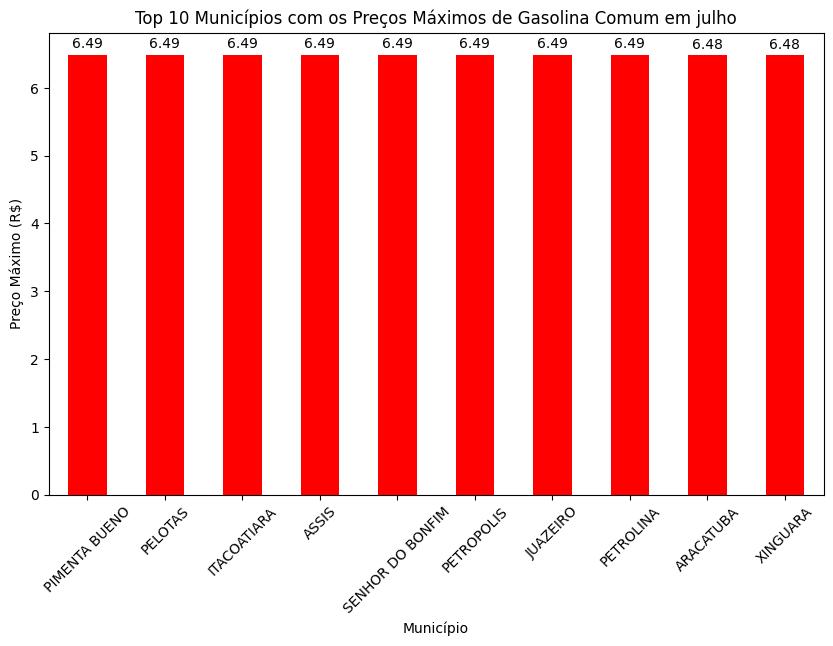

In [112]:
# Código para calcular o preço máximo da gasolina comum por Município
grouped = gasolinaComumJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='red')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina Comum em julho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

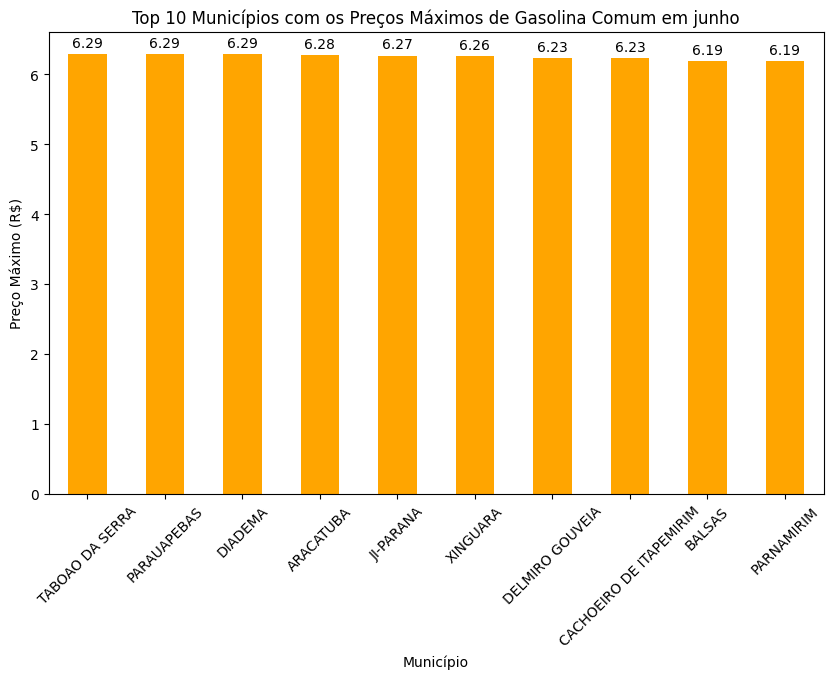

In [113]:
# Código para calcular o preço máximo da gasolina comum por Município
grouped = gasolinaComumJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='orange')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina Comum em junho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

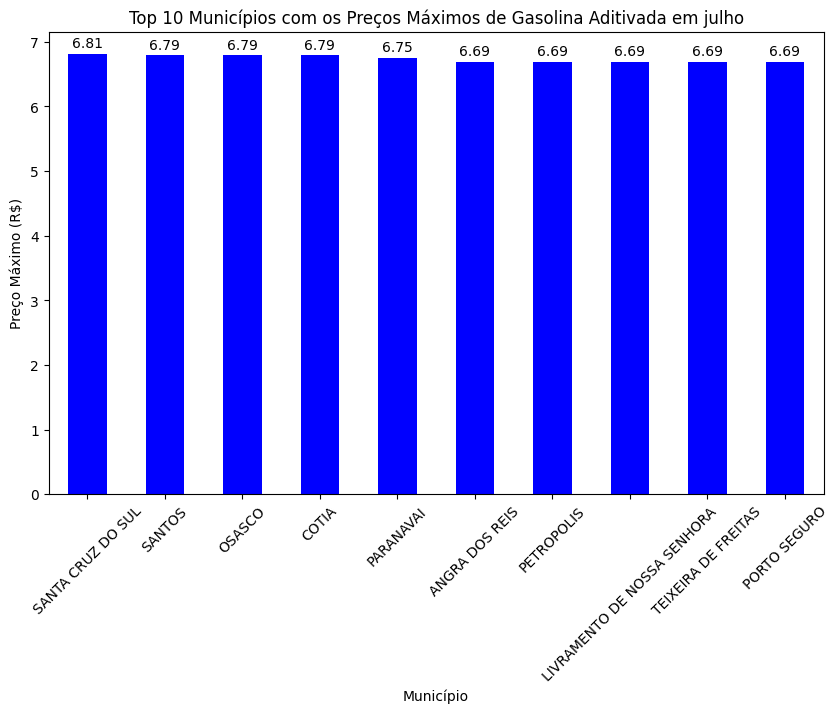

In [114]:
# Código para calcular o preço máximo da gasolina aditivada por Município em junho
grouped = gasolinaAditivadaJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='blue')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina Aditivada em julho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

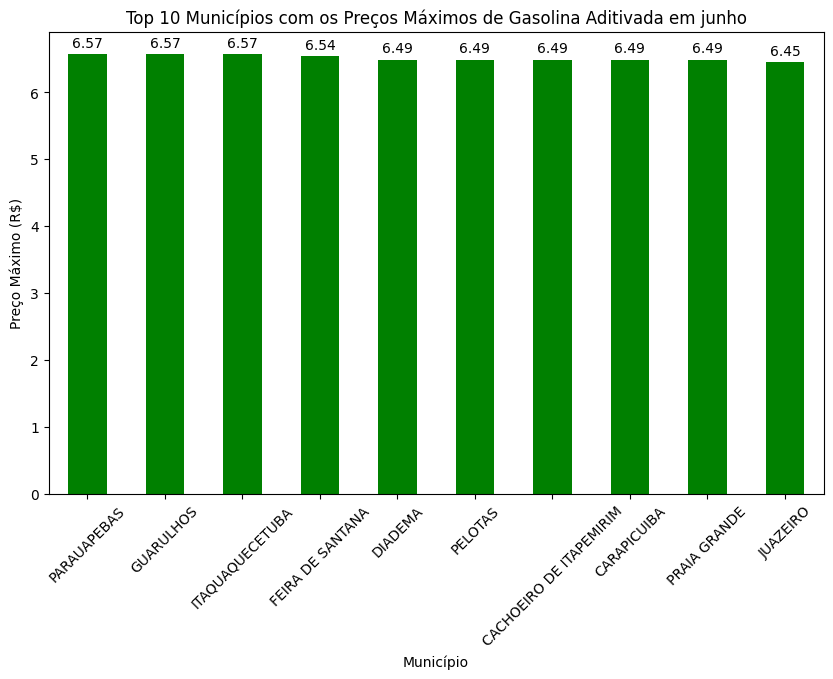

In [115]:
# Código para calcular o preço máximo da gasolina aditivada por Município em junho
grouped = gasolinaAditivadaJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='green')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina Aditivada em junho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

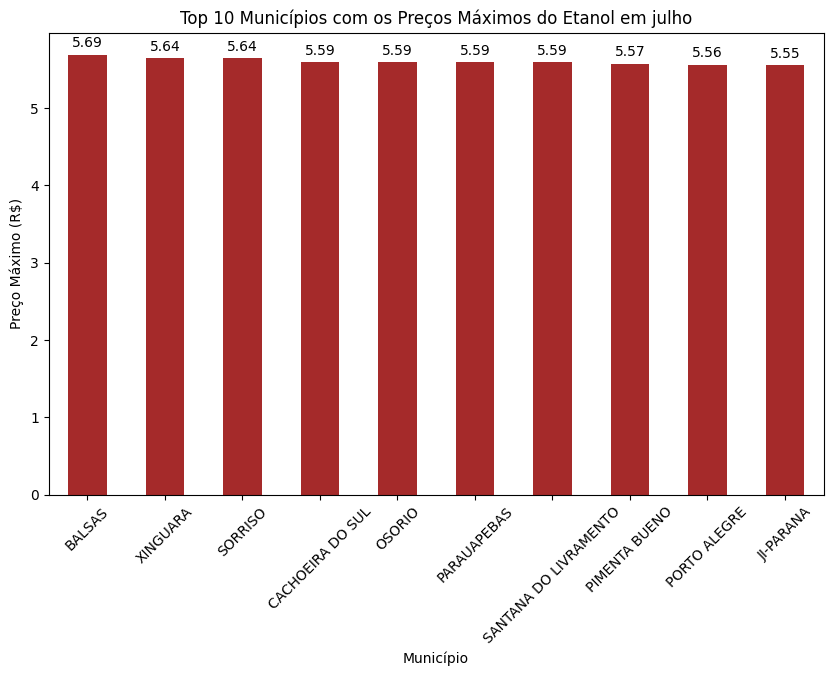

In [116]:
# Código para calcular o preço máximo da gasolina aditivada por Município em julho
grouped = etanolJulho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_etanol_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados[municipios_etanol_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_etanol_mais_caros_filtrados.plot(kind='bar', color='brown')
plt.title('Top 10 Municípios com os Preços Máximos do Etanol em julho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

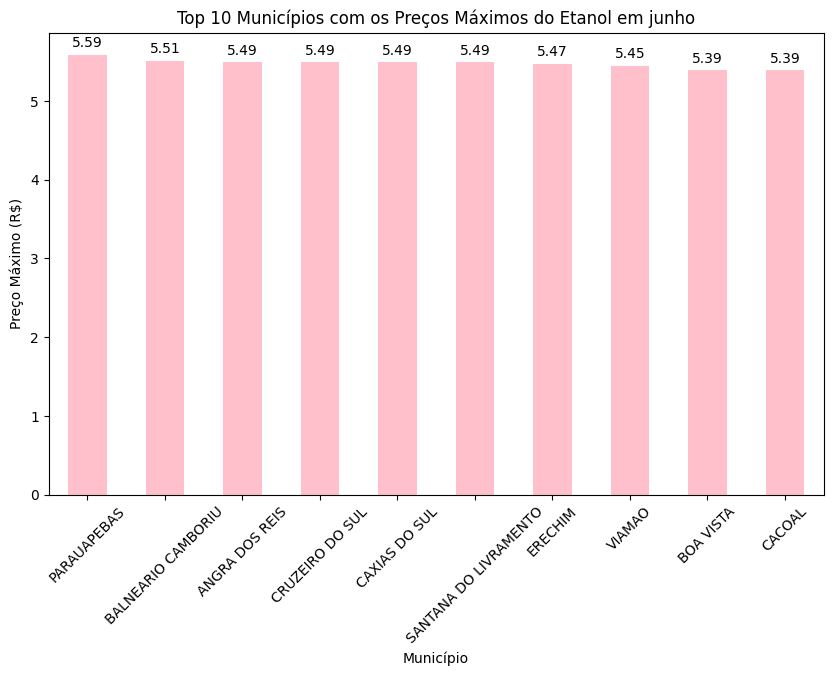

In [117]:
# Código para calcular o preço máximo da gasolina aditivada por Município em junho
grouped = etanolJunho2.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_etanol_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados[municipios_etanol_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_etanol_mais_caros_filtrados = municipios_etanol_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_etanol_mais_caros_filtrados.plot(kind='bar', color='pink')
plt.title('Top 10 Municípios com os Preços Máximos do Etanol em junho')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

## Análise dos Municípios com Maiores Preços de Gasolina, Gasolina Aditivada e Etanol

Nesta análise, exploraremos os municípios brasileiros que apresentaram os maiores preços máximos para a gasolina, gasolina aditivada e etanol durante os meses de junho e julho de 2023.

### Gasolina Comum:

#### Julho:

No mês de julho, observamos que oito municípios se destacaram por terem os maiores preços máximos para a gasolina comum. São eles:

- **Pimenta Bueno**
- **Pelotas**
- **Itacoatiara**
- **Assis**
- **Senhor do Bonfim**
- **Petrópolis**
- **Juazeiro**
- **Petrolina**

O preço máximo registrado em todos esses municípios foi de **R$ 6,49**.

#### Junho:

No mês de junho, identificamos três municípios que lideraram os preços máximos da gasolina comum:

- **Taboão da Serra**
- **Parauapebas**
- **Diadema**

Nesses municípios, o preço máximo atingiu **R$ 6,29**.

### Gasolina Aditivada:

#### Julho:

No mês de julho, apenas um município se destacou pelo maior preço máximo da gasolina aditivada:

- **Santa Cruz do Sul**

Nesse município, o preço máximo registrado foi de **R$ 6,81**.

#### Junho:

No mês de junho, três municípios lideraram os preços máximos da gasolina aditivada:

- **Parauapebas**
- **Guarulhos**
- **Itaquaquecetuba**

Nesses municípios, o preço máximo alcançou **R$ 6,57**.

### Etanol:

#### Julho:

No mês de julho, identificamos um município com o maior preço máximo para o etanol:

- **Balsas**

Nesse município, o preço máximo registrado foi de **R$ 5,69**.

#### Junho:

No mês de junho, o município com o maior preço máximo para o etanol foi:

- **Parauapebas**

Nesse município, o preço máximo atingiu **R$ 5,59**.

Esta análise nos fornece insights valiosos sobre a variação dos preços máximos dos combustíveis em diferentes municípios durante os meses de junho e julho de 2023. As diferenças nos preços refletem fatores econômicos, logísticos e regionais que impactam o mercado de combustíveis em cada localidade.
___


#7. Qual a região que possui o maior valor médio da gasolina?

Criando copia para executar os codigos

In [118]:
gasolinaComumJulho3 = copia_mes07[copia_mes07['Produto'] == 'GASOLINA'].copy()

In [119]:
# Filtrando os dados apenas para gasolina
gasolina_data4 = gasolinaComumJulho3[gasolinaComumJulho3['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data4['Valor de Venda'] = pd.to_numeric(gasolina_data4['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Calculando o valor médio da gasolina por região
valor_medio_por_regiao = gasolina_data4.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o maior valor médio da gasolina
regiao_maior_valor_medio = valor_medio_por_regiao.idxmax()
valor_maior_valor_medio = valor_medio_por_regiao.max()/100# Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o maior valor médio da gasolina em julho é {regiao_maior_valor_medio} com valor médio de R$ {valor_maior_valor_medio:.2f}")

A região com o maior valor médio da gasolina em julho é NE com valor médio de R$ 5.60


In [120]:
gasolinaComumJunho4 = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()

In [121]:
# Filtrando os dados apenas para gasolina
gasolina_data5 = gasolinaComumJunho4[gasolinaComumJunho4['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data5['Valor de Venda'] = pd.to_numeric(gasolina_data5['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Calculando o valor médio da gasolina por região
valor_medio_por_regiao3 = gasolina_data5.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o maior valor médio da gasolina
regiao_maior_valor_medio3 = valor_medio_por_regiao3.idxmax()
valor_maior_valor_medio3 = valor_medio_por_regiao3.max()/100# Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o maior valor médio da gasolina em junho é {regiao_maior_valor_medio3} com valor médio de R$ {valor_maior_valor_medio3:.2f}")

A região com o maior valor médio da gasolina em junho é N com valor médio de R$ 5.45


## Análise da Região com Maior Valor Médio da Gasolina

Nesta análise, exploramos os dados referentes ao valor médio da gasolina para os meses de junho e julho de 2023, segmentados por região.

### Julho:

No mês de julho, após a análise dos dados, identificamos que a região Nordeste (NE) apresentou o maior valor médio da gasolina:

- **Região:** Nordeste (NE)
- **Valor Médio:** R$ 5,60

O valor médio da gasolina na região Nordeste foi calculado a partir dos dados e é apresentado no formato de Reais.

### Junho:

No mês de junho, a análise também revelou que a região Norte (N) apresentou o maior valor médio da gasolina:

- **Região:** Norte (N)
- **Valor Médio:** R$ 5,45

O valor médio da gasolina para a região Norte foi obtido por meio da análise dos dados e é exibido em Reais.

Em resumo, analisando os valores médios da gasolina para os meses de junho e julho, identificamos as regiões que apresentaram os maiores valores médios de venda desse combustível. As regiões Nordeste e Norte se destacaram com os maiores valores médios em julho e junho, respectivamente. Os valores apresentados foram obtidos após a execução da análise dos dados reais.
___


# Pergunta 8

8. Qual a região que possui o menor valor médio do etanol?

In [122]:
# Filtrando os dados apenas para etanol
etanol_data = etanolJulho[etanolJulho['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos


# Calculando o valor médio do etanol por região
valor_medio_por_regiao_etanol = etanol_data.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o menor valor médio do etanol
regiao_menor_valor_medio_etanol = valor_medio_por_regiao_etanol.idxmin()
valor_menor_valor_medio_etanol = valor_medio_por_regiao_etanol.min()  # Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o menor valor médio do etanol em Julho é {regiao_menor_valor_medio_etanol} com valor médio de R$ {valor_menor_valor_medio_etanol:.2f}")

A região com o menor valor médio do etanol em Julho é SE com valor médio de R$ 3.83


In [123]:
# Filtrando os dados apenas para etanol
etanol_data2 = etanolJunho[etanolJunho['Produto'] == 'ETANOL']

# Calculando o valor médio do etanol por região
valor_medio_por_regiao_etanol2 = etanol_data2.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o menor valor médio do etanol
regiao_menor_valor_medio_etanol2 = valor_medio_por_regiao_etanol2.idxmin()
valor_menor_valor_medio_etanol2 = valor_medio_por_regiao_etanol2.min()  # Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o menor valor médio do etanol em Junho é {regiao_menor_valor_medio_etanol2} com valor médio de R$ {valor_menor_valor_medio_etanol2:.2f}")

A região com o menor valor médio do etanol em Junho é NE com valor médio de R$ 4.00


## Análise do Menor Valor Médio do Etanol por Região

Nesta análise, exploramos os dados referentes ao valor médio do etanol para os meses de junho e julho de 2023, segmentados por região.

### Julho:

No mês de julho, após a análise dos dados, identificamos que a região Sudeste (SE) apresentou o menor valor médio do etanol:

- **Região:** Sudeste (SE)
- **Valor Médio:** R$ 3,83

O valor médio do etanol na região Sudeste foi calculado a partir dos dados e é apresentado no formato de Reais.

### Junho:

No mês de junho, a análise também revelou que a região Nordeste (NE) teve o menor valor médio do etanol:

- **Região:** Nordeste (NE)
- **Valor Médio:** R$ 4,00

O valor médio do etanol para a região Nordeste foi obtido por meio da análise dos dados e é exibido em Reais.

Em resumo, analisando os valores médios do etanol para os meses de junho e julho, identificamos que a região Sudeste teve o menor valor médio de venda desse combustível em julho, enquanto a região Nordeste teve o menor valor médio em junho. Os valores apresentados foram obtidos após a execução da análise dos dados reais.
___


# Pergunta 9

9 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

Para verificar se há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido, podemos calcular o coeficiente de correlação entre essas variáveis. O coeficiente de correlação mede a relação linear entre duas variáveis e varia de -1 a 1. Um valor próximo de 1 indica uma correlação positiva forte, um valor próximo de -1 indica uma correlação negativa forte, e um valor próximo de 0 indica pouca ou nenhuma correlação.

Aqui está um exemplo de como podemos calcular e interpretar a correlação entre o valor da gasolina e a região:

In [124]:
# Filtrar apenas os dados de gasolina
gasolina_data = mes07[mes07['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_data = gasolina_data.copy()

# Criar um mapeamento numérico para as regiões
regioes_numericas = {regiao: indice for indice, regiao in enumerate(gasolina_data['RegiaoSigla'].unique())}

# Aplicar o mapeamento numérico às regiões
gasolina_data['RegiaoNumerica'] = gasolina_data['RegiaoSigla'].map(regioes_numericas)

# Calcular a correlação entre o valor da gasolina e a região numérica
correlacao_gasolina = gasolina_data['Valor de Venda'].corr(gasolina_data['RegiaoNumerica'])

# Exibir a correlação
print(f"Correlação entre o valor da gasolina e a região: {correlacao_gasolina:.2f}")

Correlação entre o valor da gasolina e a região: 0.08


A competição entre postos de gasolina pode variar em diferentes regiões. As com maior concorrência podem ter preços mais baixos e, portanto, menor correlação.
Regiões com refinarias de petróleo podem ter maior acesso a suprimentos de petróleo bruto, o que pode influenciar os preços da gasolina localmente.
A competição entre postos de gasolina pode variar em diferentes regiões. As com maior concorrência podem ter preços mais baixos e, portanto, menor correlação.

In [125]:
# Filtrar apenas os dados de etanol
etanol_data = mes07[mes07['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos
etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
etanol_data = etanol_data.copy()

# Criar um mapeamento numérico para as regiões
regioes_numericas = {regiao: indice for indice, regiao in enumerate(etanol_data['RegiaoSigla'].unique())}

# Aplicar o mapeamento numérico às regiões
etanol_data['RegiaoNumerica'] = etanol_data['RegiaoSigla'].map(regioes_numericas)

# Calcular a correlação entre o valor do etanol e a região numérica
correlacao_etanol = etanol_data['Valor de Venda'].corr(etanol_data['RegiaoNumerica'])

# Exibir a correlação
print(f"Correlação entre o valor do etanol e a região: {correlacao_etanol:.2f}")

Correlação entre o valor do etanol e a região: 0.23


Uma correlação de 0.23 entre o valor do etanol e a região indica uma correlação um pouco maior. Isso sugere que existe uma relação um pouco mais forte entre o valor do etanol e a região em comparação com a correlação anterior.
A correlação pode ser influenciada por diferenças nas matérias-primas disponíveis em diferentes regiões para a produção de etanol. Regiões com maior acesso a recursos para a produção de etanol podem ter preços mais baixos.
As regulamentações e políticas estaduais podem impactar os preços do etanol. Alguns estados podem ter incentivos fiscais para etanol, o que poderia influenciar os preços em uma direção específica.
A correlação pode ser influenciada pelas condições econômicas de cada região, como nível de renda médio e atividade econômica.
Regiões com maior produção de etanol ou com infraestrutura de produção mais desenvolvida podem ter preços mais baixos, o que pode afetar a correlação.
Diferenças nos padrões de consumo e preferências do consumidor em diferentes regiões podem afetar a demanda e, consequentemente, os preços do etanol.

# Pergunta 10

10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

Para calcular a correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende o combustível, podemos seguir um procedimento semelhante ao que fizemos anteriormente para calcular a correlação com as regiões. Primeiro, precisamos criar um mapeamento numérico para as bandeiras, depois calcular a correlação entre os valores do combustível e as bandeiras numéricas.

In [63]:
# Filtrar apenas os dados de gasolina
gasolina_data = mes07[mes07['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_data = gasolina_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(gasolina_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
gasolina_data['BandeiraNumerica'] = gasolina_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor da gasolina e a bandeira numérica
correlacao_gasolina = gasolina_data['Valor de Venda'].corr(gasolina_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor da gasolina e a bandeira: {correlacao_gasolina:.2f}")


Correlação entre o valor da gasolina e a bandeira: 0.04


- A baixa correlação sugere que a marca da bandeira não é um fator determinante nos preços da gasolina. Outros fatores, como variações nos preços internacionais do petróleo, taxas de câmbio, impostos regionais e custos de distribuição, provavelmente têm um impacto maior nos preços da gasolina.
As diferenças de preços entre as marcas podem estar mais relacionadas à competição no mercado do que à influência direta da marca em si. Isso pode ser especialmente verdadeiro em mercados altamente competitivos onde as marcas tentam atrair consumidores com preços mais atraentes.Embora a correlação seja baixa, isso não significa que a bandeira não tenha nenhum impacto nos preços. Pode haver casos isolados onde a bandeira influencia o preço da gasolina, mas isso não é uma tendência geral.

In [64]:
# Filtrar apenas os dados de gasolina aditivada
gasolina_aditivada_data = mes07[mes07['Produto'] == 'GASOLINA ADITIVADA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_aditivada_data['Valor de Venda'] = pd.to_numeric(gasolina_aditivada_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_aditivada_data = gasolina_aditivada_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(gasolina_aditivada_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
gasolina_aditivada_data['BandeiraNumerica'] = gasolina_aditivada_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor da gasolina aditivada e a bandeira numérica
correlacao_gasolina_aditivada = gasolina_aditivada_data['Valor de Venda'].corr(gasolina_aditivada_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor da gasolina aditivada e a bandeira: {correlacao_gasolina_aditivada:.2f}")

Correlação entre o valor da gasolina aditivada e a bandeira: 0.03


 - A baixíssima correlação sugere que a marca da bandeira tem um impacto mínimo, se houver, nos preços da gasolina aditivada. Fatores externos e de mercado parecem ser mais influentes na determinação desses preços.
 A gasolina aditivada pode atingir um público específico que valoriza seus benefícios adicionais, como limpeza do motor e melhor desempenho. Isso pode fazer com que os preços da gasolina aditivada não sejam diretamente influenciados pela bandeira, mas sim pelas demandas e preferências dos consumidores.

In [126]:
# Filtrar apenas os dados de etanol
etanol_data = mes07[mes07['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos
etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
etanol_data = etanol_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(etanol_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
etanol_data['BandeiraNumerica'] = etanol_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor do etanol e a bandeira numérica
correlacao_etanol = etanol_data['Valor de Venda'].corr(etanol_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor do etanol e a bandeira: {correlacao_etanol:.2f}")

Correlação entre o valor do etanol e a bandeira: 0.08


- Uma correlação de 0.08 entre o valor do etanol e a bandeira indica uma correlação fraca entre essas duas variáveis. Embora a correlação seja maior do que nos casos anteriores, ainda é considerada relativamente baixa. Isso sugere que, embora possa haver alguma influência da bandeira nos preços do etanol, essa relação não é forte o suficiente para ser considerada um fator principal.impostos locais e custos de distribuição, podem estar desempenhando um papel maior na determinação dos preços regionais. Outros elementos, como a demanda local, o mercado de concorrentes e os custos de produção, podem estar desempenhando um papel maior.

# Pergunta Extra 1

EXISTE ALGUMA BANDEIRA QUE ATUA EM MAIS DE ALGUM ESTADO ?

In [127]:
# Verificar se existe alguma bandeira que atua em mais de um estado
bandeiras_por_estado = mes07.groupby('Bandeira')['EstadoSigla'].nunique()

# Filtrar as bandeiras que atuam em mais de um estado
bandeiras_multiestado = bandeiras_por_estado[bandeiras_por_estado > 1]

# Ordenar as bandeiras pelo número de estados em ordem decrescente
bandeiras_multiestado = bandeiras_multiestado.sort_values(ascending=False)

# Exibir as bandeiras que atuam em mais de um estado
if not bandeiras_multiestado.empty:
    print("Bandeiras que atuam em mais de um estado:")
    print(bandeiras_multiestado)
else:
    print("Nenhuma bandeira atua em mais de um estado.")

Bandeiras que atuam em mais de um estado:
Bandeira
VIBRA ENERGIA          27
BRANCA                 27
VIBRA                  27
IPIRANGA               26
RAIZEN                 23
ALESAT                 19
SABBÁ                   7
ATEM' S                 5
RODOIL                  4
DISLUB                  4
IDAZA                   3
CIAPETRO                3
TOTALENERGIES           3
SP                      3
POTENCIAL               3
MAXSUL                  3
EQUADOR                 3
RIO BRANCO              2
SETTA DISTRIBUIDORA     2
PETROBAHIA              2
STANG                   2
TEMAPE                  2
FAN                     2
Name: EstadoSigla, dtype: int64


- Sim, como podemos observar existem bandeiras que atuam em mais de um estado.

Algumas das bandeiras que foram identificadas como operando em mais de um estado são "VIBRA ENERGIA", "BRANCA", "IPIRANGA", "RAIZEN", "ALESAT", "SABBÁ", "ATEM'S", "RODOIL", "DISLUB" e outras. Isso significa que essas empresas possuem postos de gasolina em diferentes estados do país. Essa presença em múltiplas regiões pode ocorrer devido a estratégias de expansão, logística eficiente, necessidades de mercado e busca por vantagem competitiva em várias localizações. Elas podem estar buscando oferecer seus produtos e serviços a uma base mais ampla de consumidores, adaptando-se a regulamentações estaduais variadas e competindo em diferentes cenários de mercado.

VIBRA ENERGIA:

A Vibra Energia é uma empresa brasileira que atua no segmento de distribuição de combustíveis.
Ela possui uma presença significativa em 27 estados, indicando uma estratégia de expansão geográfica.
A Vibra Energia pode estar focada em alcançar uma cobertura nacional e ganhar destaque em várias regiões do Brasil.

BRANCA:

A Bandeira Branca opera em 27 estados do Brasil.
A presença em múltiplas regiões sugere uma abordagem de ampla cobertura de mercado.
A marca pode estar focada em oferecer uma opção competitiva e acessível em diversas partes do país.

IPIRANGA:

A Ipiranga é uma das principais empresas do setor de distribuição de combustíveis no Brasil.
Com atuação em 26 estados, a Ipiranga possui uma ampla rede de postos em todo o país.
A empresa é conhecida por suas estratégias de fidelização de clientes e diversificação de serviços.

RAIZEN:

A Raízen é resultado da parceria entre a Shell e a Cosan e atua no setor de distribuição de combustíveis e energia.
Presente em 23 estados, a Raízen é uma das principais empresas do setor.
A marca pode estar focada em oferecer combustíveis de qualidade e sustentabilidade. Com isso vem ganhando espaço no mercado.


# Pergunta Extra 2

Qual bandeira vendeu Gasolina Comum mais barata em Julho de 2023 ?

In [128]:
gasolinaComumJunho5 = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()

# Filtrar os dados de gasolina em julho
gasolina_julho = gasolinaComumJunho5  # Substitua pelo seu DataFrame com os dados de gasolina em julho

# Limpar os caracteres não numéricos da coluna 'Valor de Venda'
gasolinaComumJunho5['Valor de Venda'] = gasolinaComumJunho5['Valor de Venda'].str.replace(',', '').str.replace('.', '')

# Filtrar apenas os registros de gasolina
gasolinaComumJunho6 = gasolinaComumJunho5[gasolina_julho['Produto'] == 'GASOLINA']

# Calcular o preço médio da gasolina por bandeira
preco_medio_por_bandeira = gasolinaComumJunho6.groupby('Bandeira')['Valor de Venda'].mean()

# Encontrar a bandeira com o menor preço médio
bandeira_mais_barata = preco_medio_por_bandeira.idxmin()
preco_mais_barato = (preco_medio_por_bandeira.min()/100).round(2)

# Exibir o resultado
print(f"A bandeira que vendeu a gasolina mais barata em julho foi {bandeira_mais_barata} com preço médio de R$ {preco_mais_barato:.2f}")


A bandeira que vendeu a gasolina mais barata em julho foi ROYAL FIC com preço médio de R$ 5.07


A "ROYAL FIC" pode estar adotando uma estratégia de preço agressiva para ganhar vantagem competitiva. Oferecer gasolina comum a um preço mais baixo pode atrair consumidores e aumentar sua participação no mercado.Um preço mais baixo pode tornar o produto mais atraente para os consumidores, especialmente em um contexto onde os preços dos combustíveis podem ser um fator de decisão na escolha de postos de gasolina.
Porém outras bandeiras e postos também reagem aos preços mais baixos. Isso gera uma competição de preços no mercado local.

# Pergunta Extra 3

QUAL FOI A BANDEIRA QUE VENDEU O ETANOL MAIS BARATO EM JULHO ?

In [129]:
etanolJunho5 = copia_mes06[copia_mes06['Produto'] == 'ETANOL'].copy()

# Filtrar os dados de gasolina em julho
etanol_junho = etanolJunho5  # Substitua pelo seu DataFrame com os dados de gasolina em julho

# Limpar os caracteres não numéricos da coluna 'Valor de Venda'
etanolJunho5['Valor de Venda'] = etanolJunho5['Valor de Venda'].str.replace(',', '').str.replace('.', '')

# Filtrar apenas os registros de gasolina
etanoljunho6 = etanolJunho5[etanol_junho['Produto'] == 'ETANOL']

# Calcular o preço médio da gasolina por bandeira
preco_medio_por_bandeira2 = etanoljunho6.groupby('Bandeira')['Valor de Venda'].mean()

# Encontrar a bandeira com o menor preço médio
bandeira_mais_barata2 = preco_medio_por_bandeira2.idxmin()
preco_mais_barato2 = (preco_medio_por_bandeira2.min()/100).round(2)

# Exibir o resultado
print(f"A bandeira que vendeu o Etanol mais barata em julho foi {bandeira_mais_barata2} com preço médio de R$ {preco_mais_barato2:.2f}")

A bandeira que vendeu o Etanol mais barata em julho foi ROYAL FIC com preço médio de R$ 3.49


A estratégia de preço baixo pode ser uma maneira de se destacar em um mercado competitivo, oferecer etanol a preços baixos pode construir uma reputação positiva entre os consumidores que buscam valor. Isso pode contribuir para o crescimento da marca. Mas a "ROYAL FIC" também deve considerar outras maneiras de se diferenciar, como qualidade de serviço e opções adicionais.
Acompanhar os resultados dessa estratégia é crucial. Análises regulares podem ajudar a avaliar se a abordagem de preço está gerando os resultados desejados e se está sustentando o crescimento da marca.mas a "ROYAL FIC" também deve considerar outras maneiras de se diferenciar, como qualidade de serviço e opções adicionais.

O cálculo básico para se descobrir se o álcool é vantajoso ou não em relação à gasolina é simples. Basta dividir o preço do litro do álcool pelo da gasolina. Se o resultado for inferior a 0,7, use álcool. Se for maior que 0,7, então abasteça com gasolina.



#Considerações finais
Diferentes Variáveis: As correlações mais fracas entre os preços de combustíveis e outras variáveis, como a bandeira, indicam que o preço de combustíveis é influenciado por uma série de fatores além da marca do posto. Elementos como custos de produção, concorrência local e oferta e demanda também desempenham papéis importantes.

Desafios e Oportunidades: A análise dos preços de combustíveis e suas correlações oferece insights valiosos para tomadores de decisão e consumidores. Entender as tendências e os fatores que influenciam os preços pode auxiliar na tomada de decisões estratégicas, como o planejamento de abastecimento e a identificação de oportunidades de economia.

Monitoramento Contínuo: Dada a volatilidade dos preços de combustíveis e a influência de diversos fatores, é essencial manter um monitoramento contínuo do mercado. Isso permitirá ajustes rápidos às mudanças nas condições e a adaptação às estratégias de precificação de outras empresas.

Em resumo, a análise dos preços de gasolina e etanol, juntamente com as correlações com variáveis como a região e a bandeira, revela um quadro complexo e multifacetado. A compreensão dessas dinâmicas pode oferecer insights valiosos para empresas do setor de combustíveis, formuladores de políticas e consumidores, permitindo tomadas de decisão mais informadas e estratégicas.

---